# Второе задание

In [1]:
!pip3 install pandas
!pip3 install matplotlib
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
import pandas as pd
import math

In [2]:
df = pd.read_csv('./to_spreadsheet.csv', encoding = 'utf-16')
df

,area,cluster,cluster_name,keyword,count,x,y,color
0,ar\vr,0,Кластер 0,written conflict fabulous,1443,2.991167,7.106799,#17becf
1,ar\vr,0,Кластер 0,reservations linking,751,10.195602,12.259496,#17becf
2,ar\vr,0,Кластер 0,interfaces neutral,586,10.443533,13.809915,#17becf
3,ar\vr,0,Кластер 0,committees parallel,173,6.735260,3.613983,#17becf
4,ar\vr,1,Кластер 1,postcards looked republic detector,1397,10.474474,6.220012,#bcbd22
...,...,...,...,...,...,...,...,...
204,worlds,2,Кластер 2,ringtone parental,471,11.723895,4.363994,#7f7f7f
205,worlds,2,Кластер 2,recipient traffic,236,5.593629,0.553368,#7f7f7f
206,worlds,3,Кластер 3,immunology plates,1653,2.407028,7.651527,#e377c2
207,worlds,3,Кластер 3,holdings herbal,1476,3.986508,10.906340,#e377c2


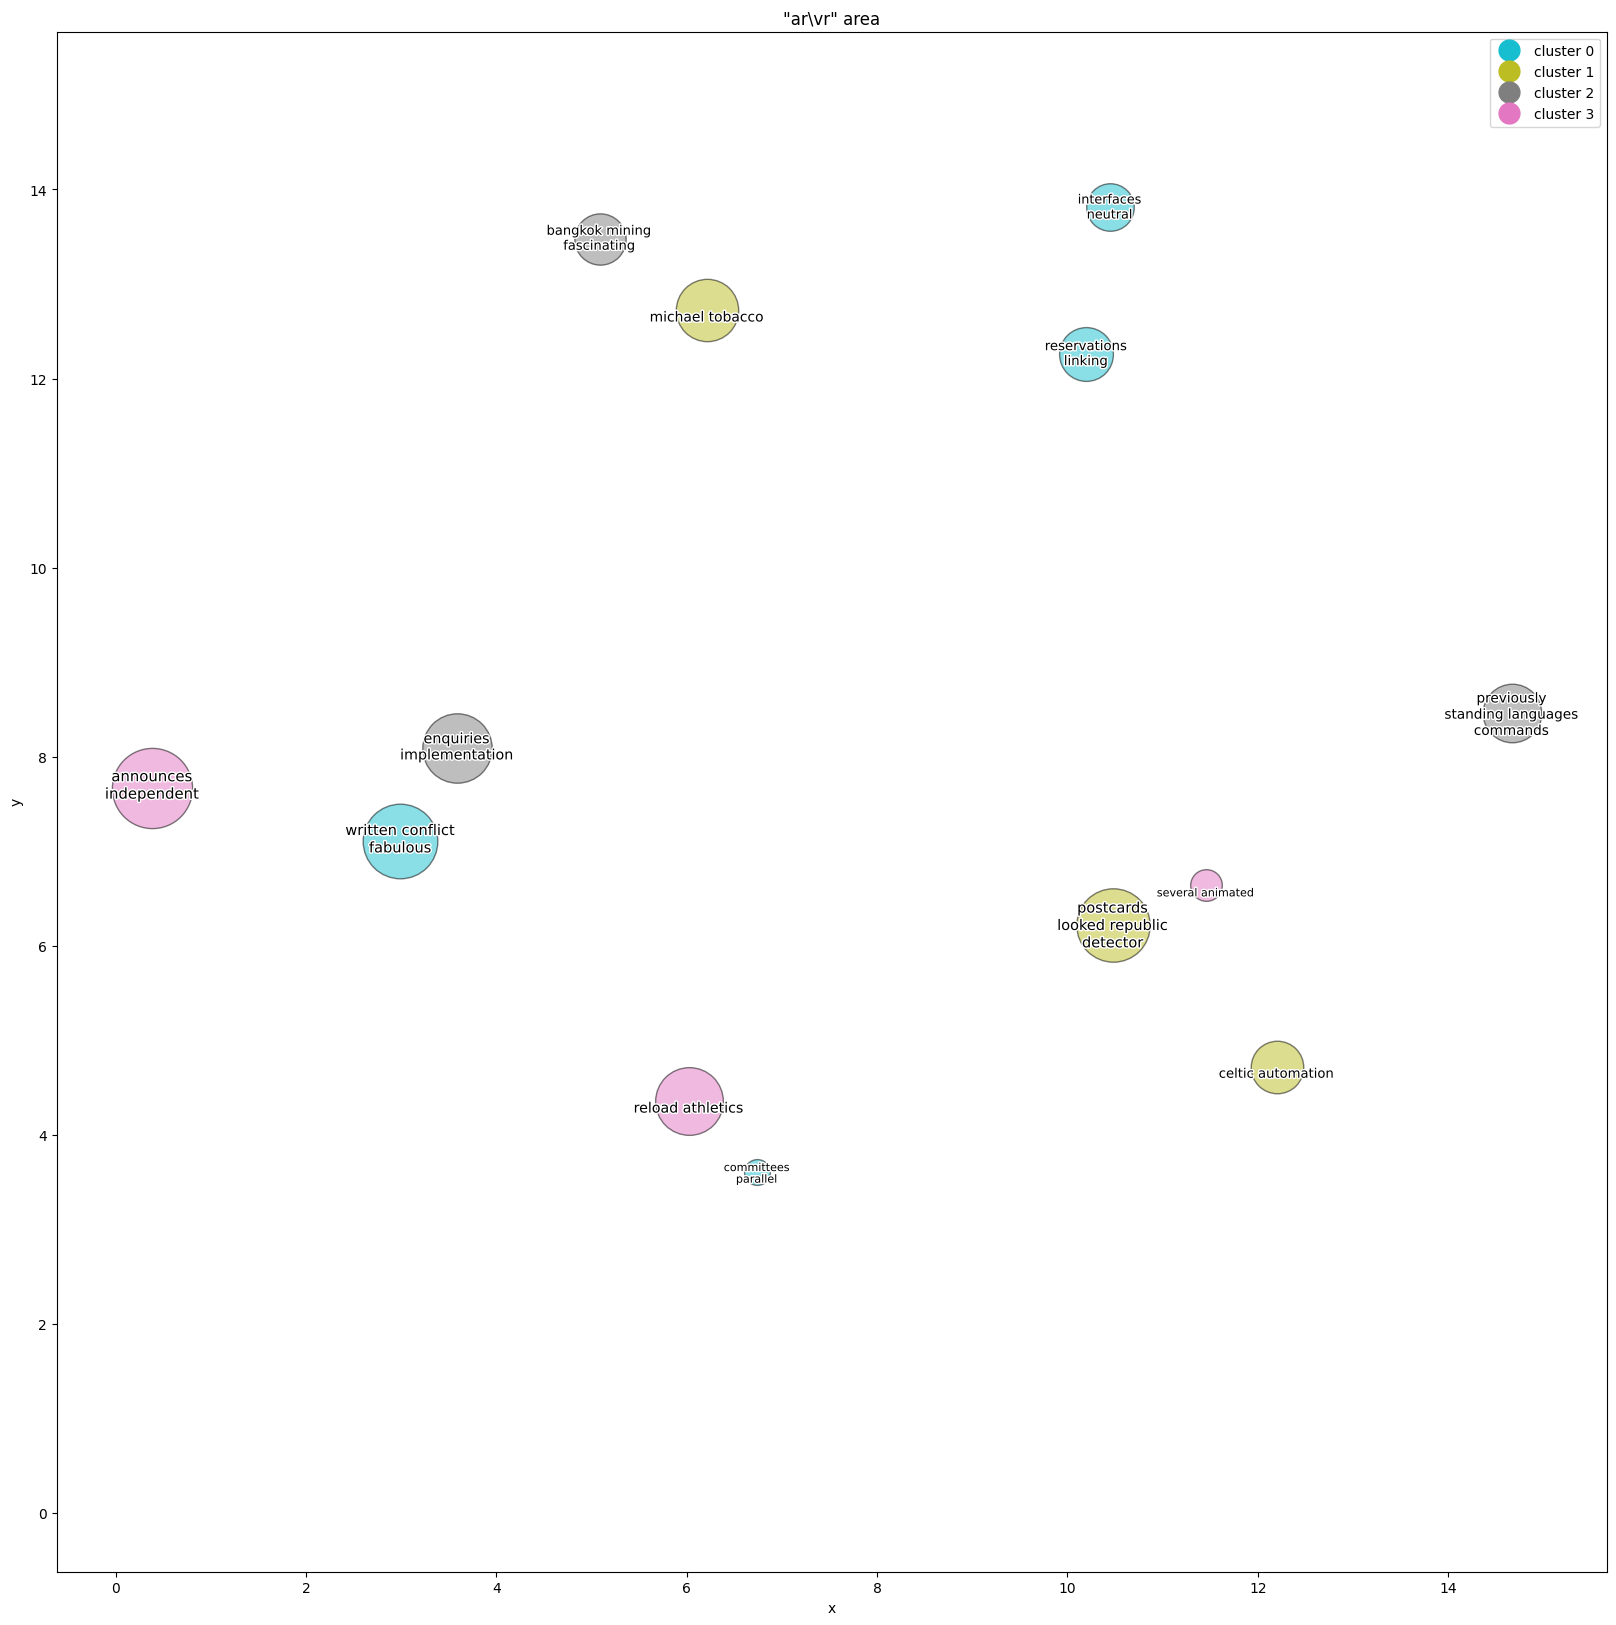

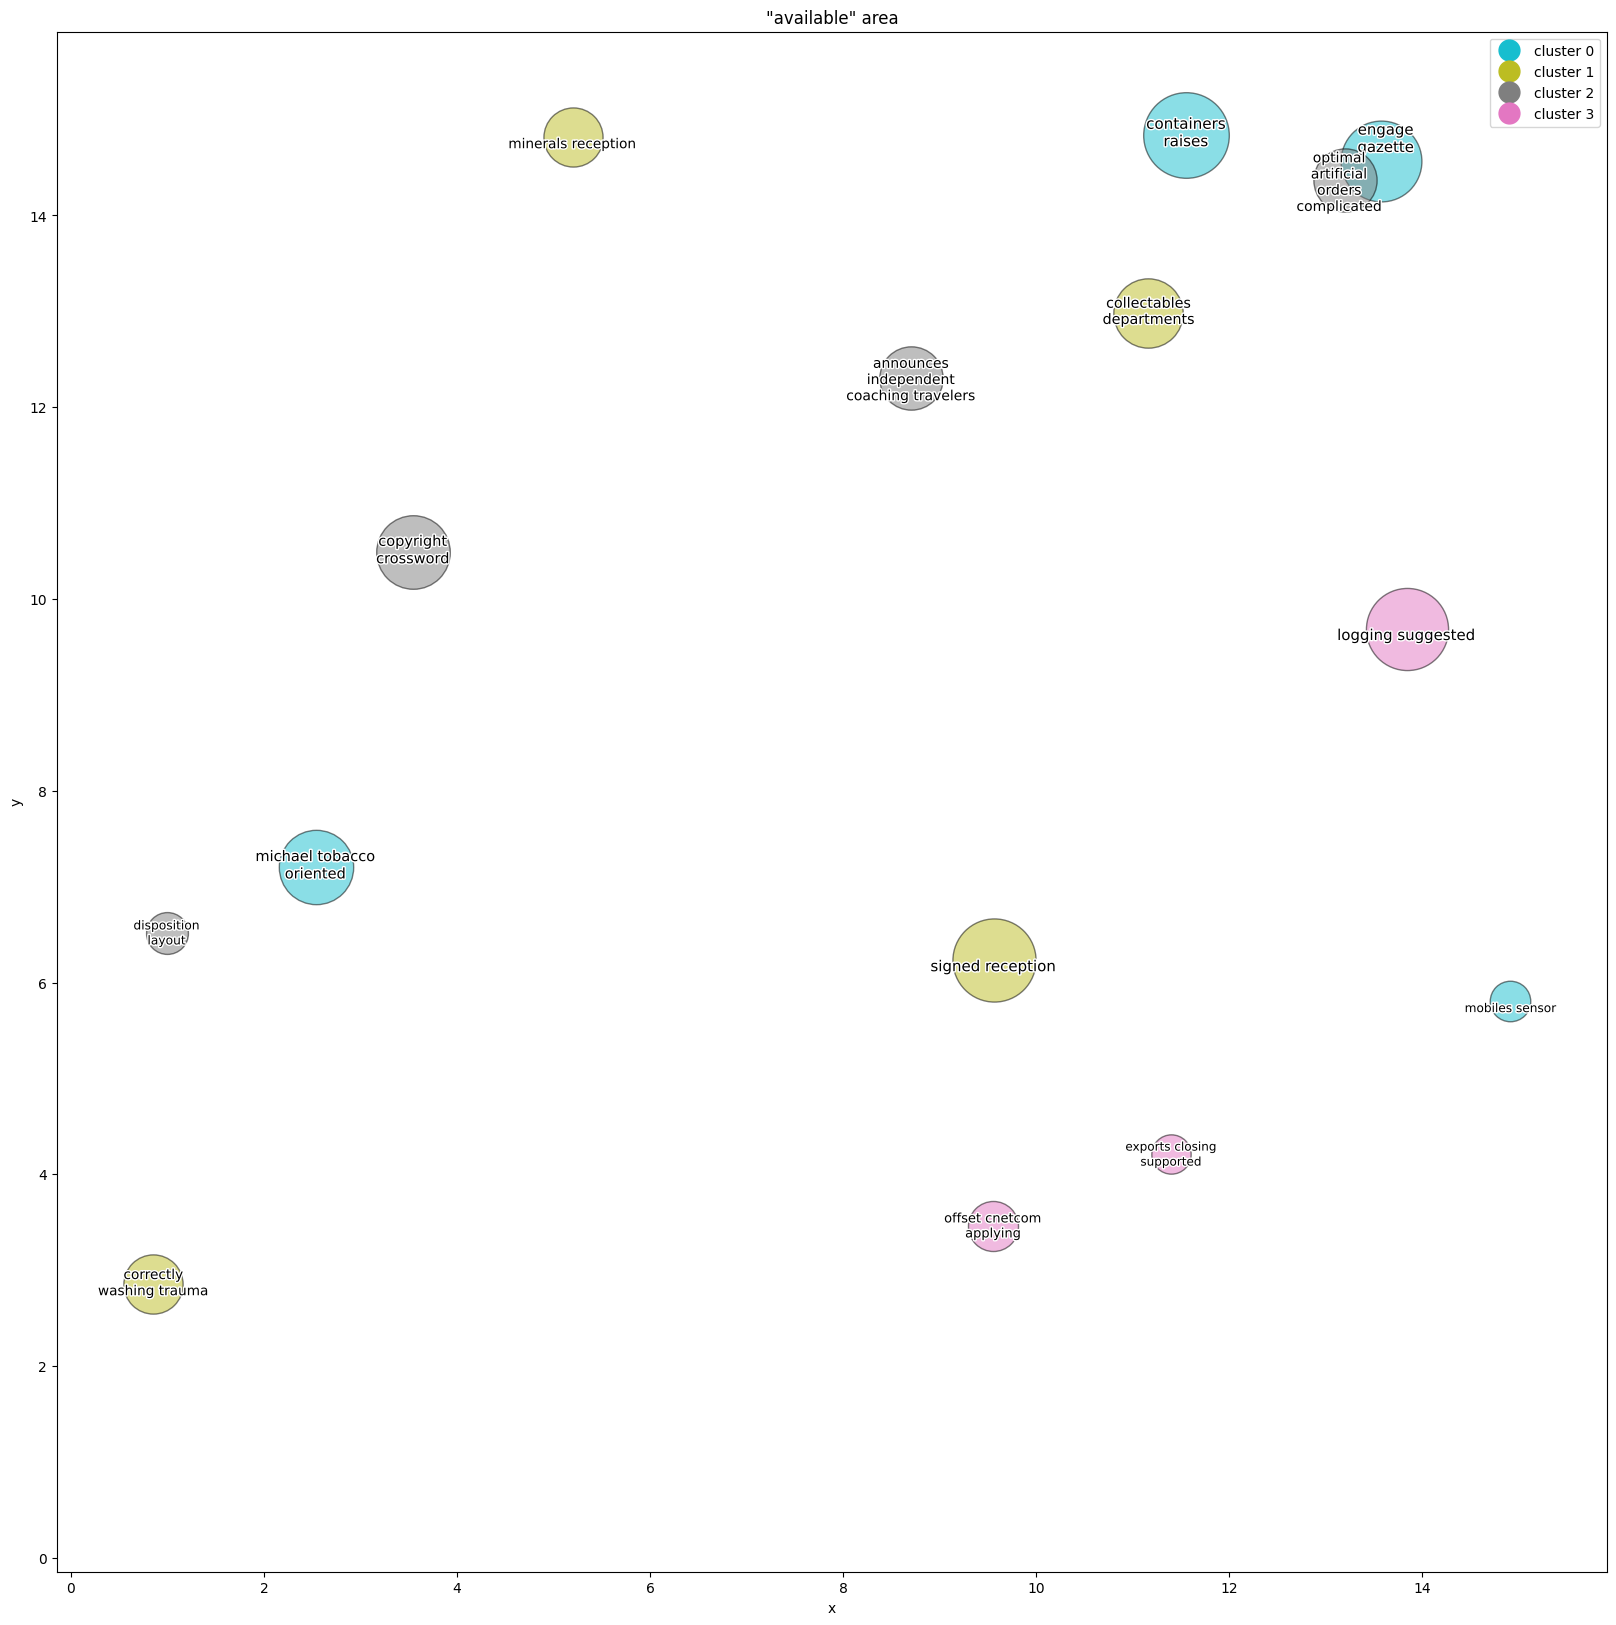

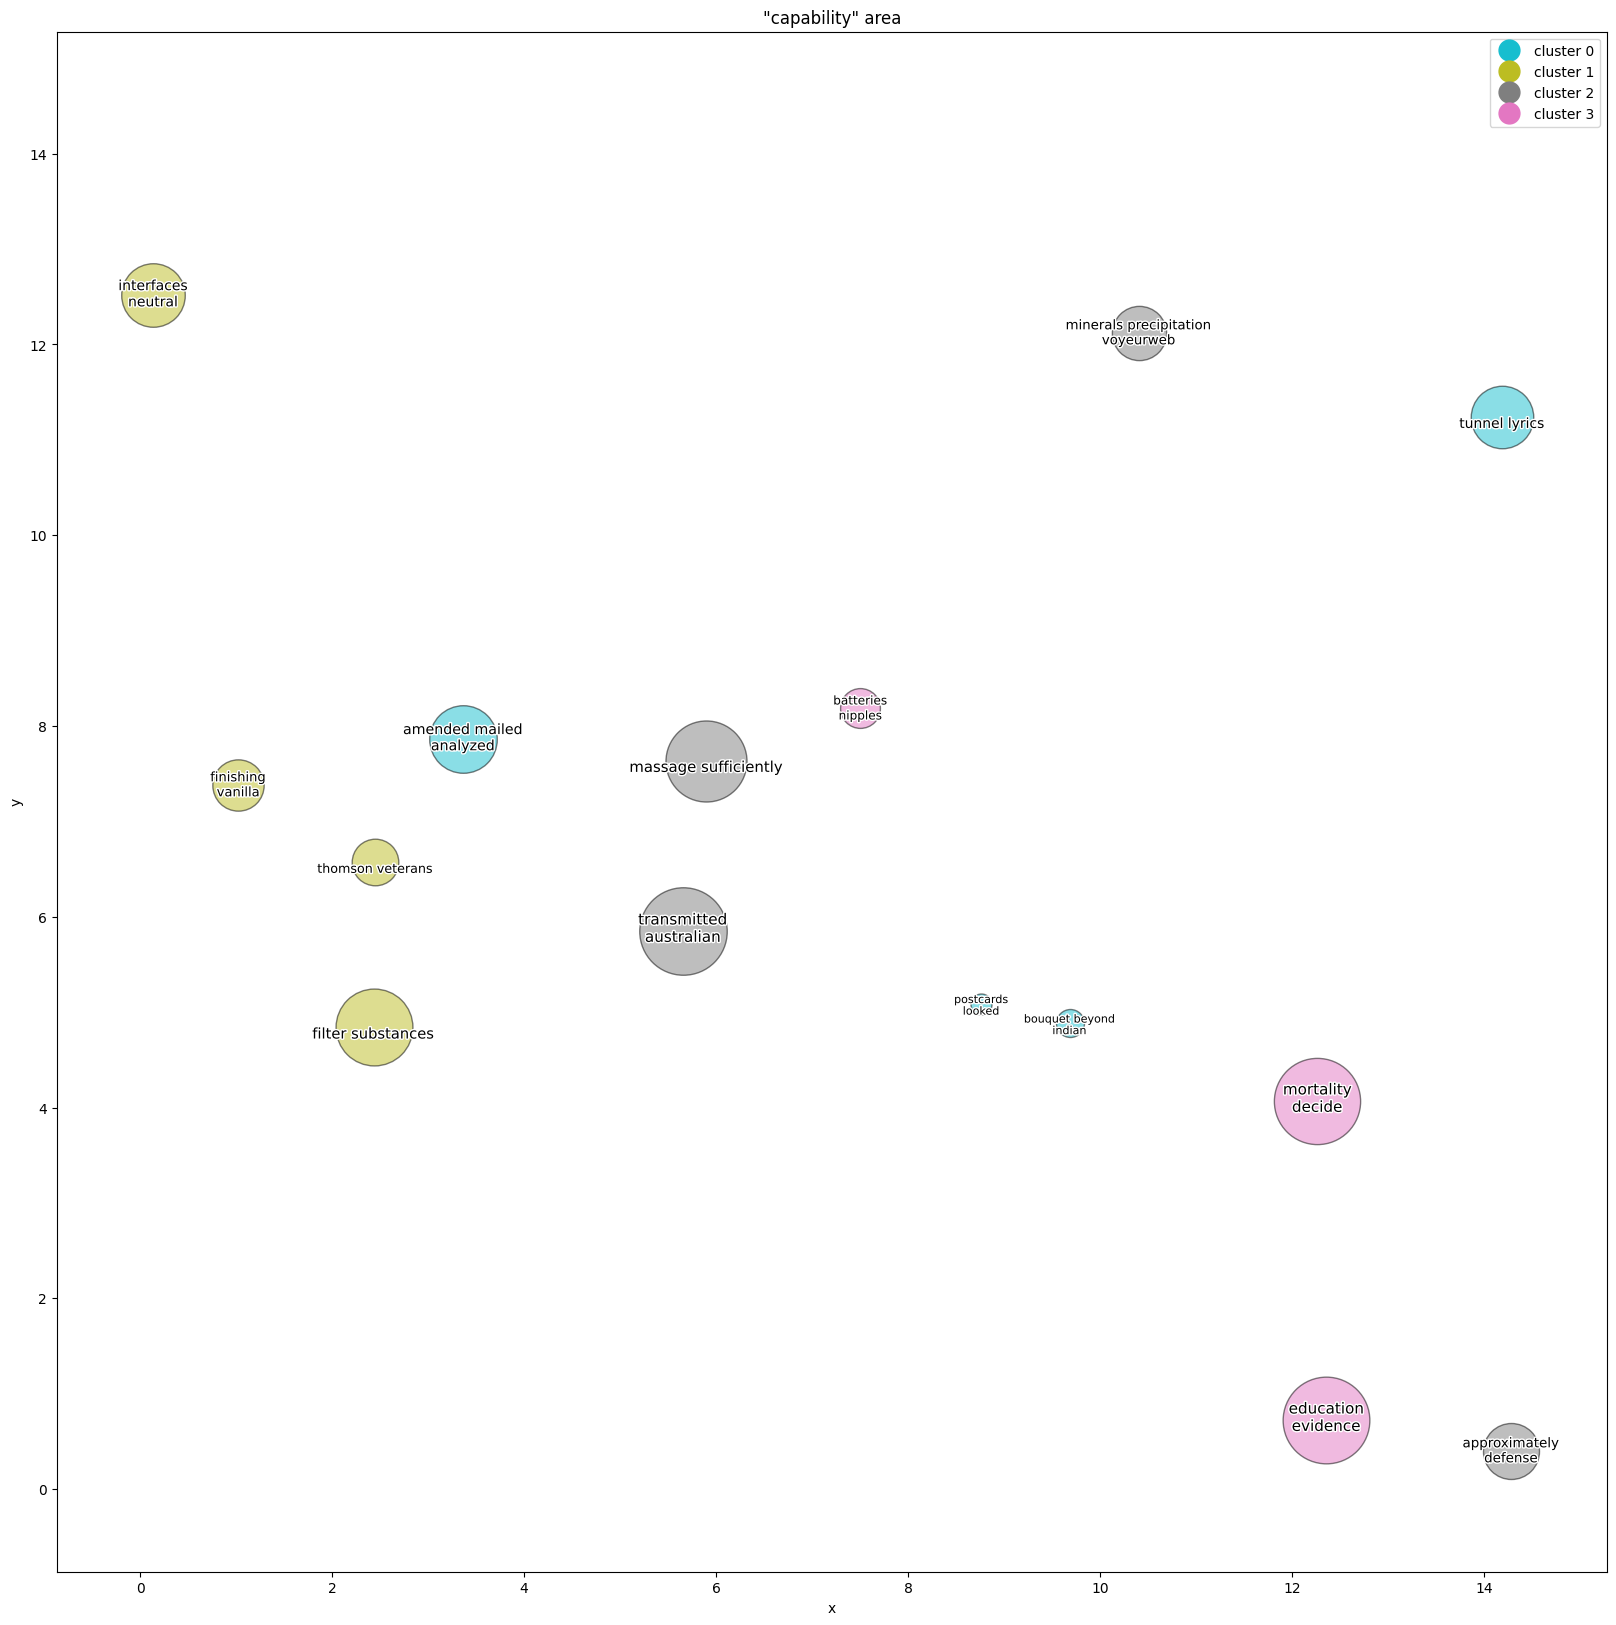

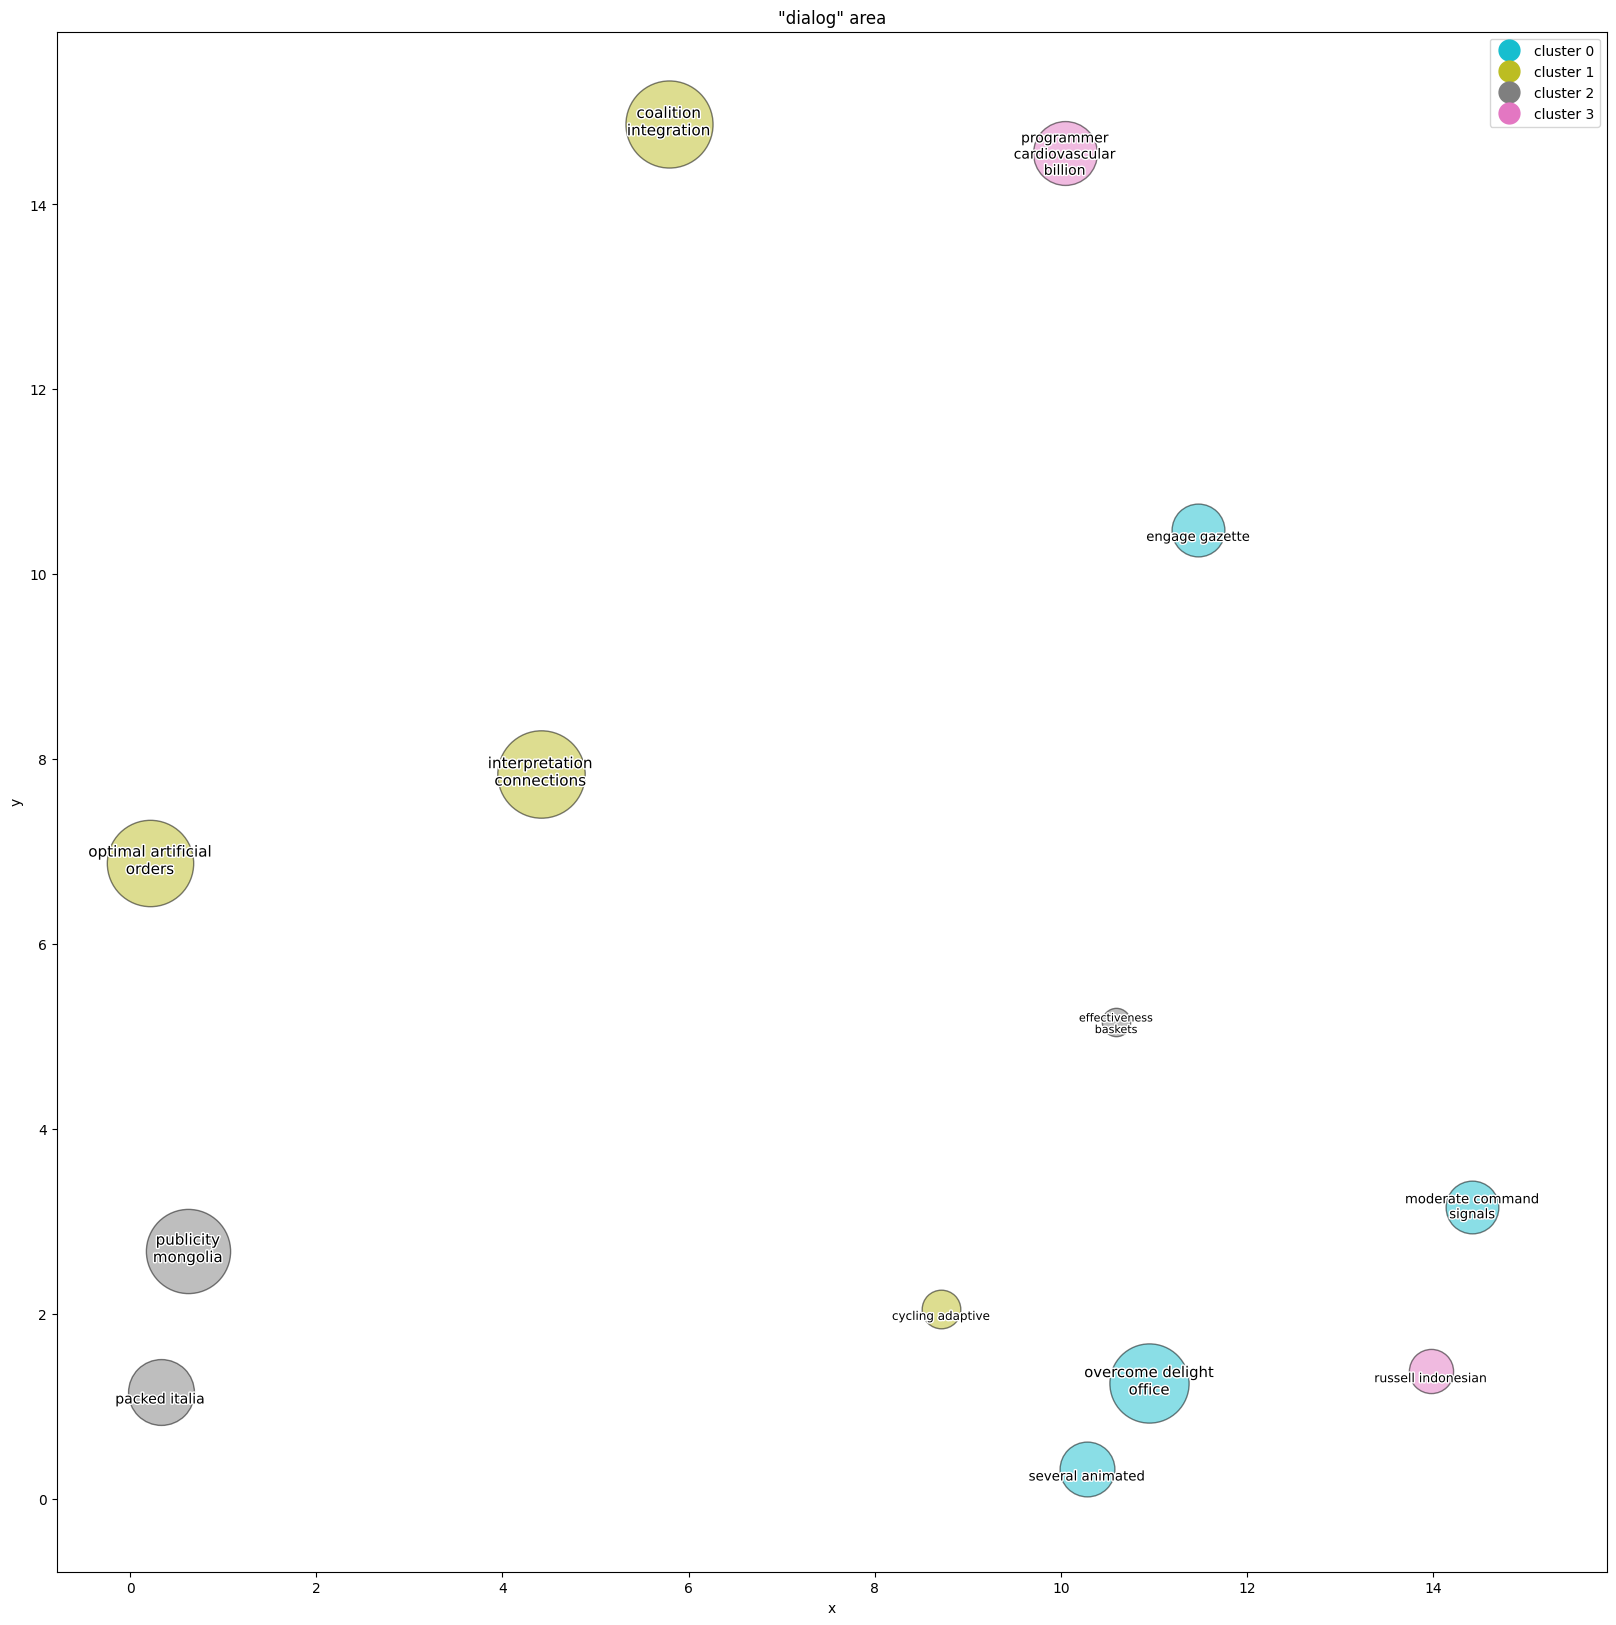

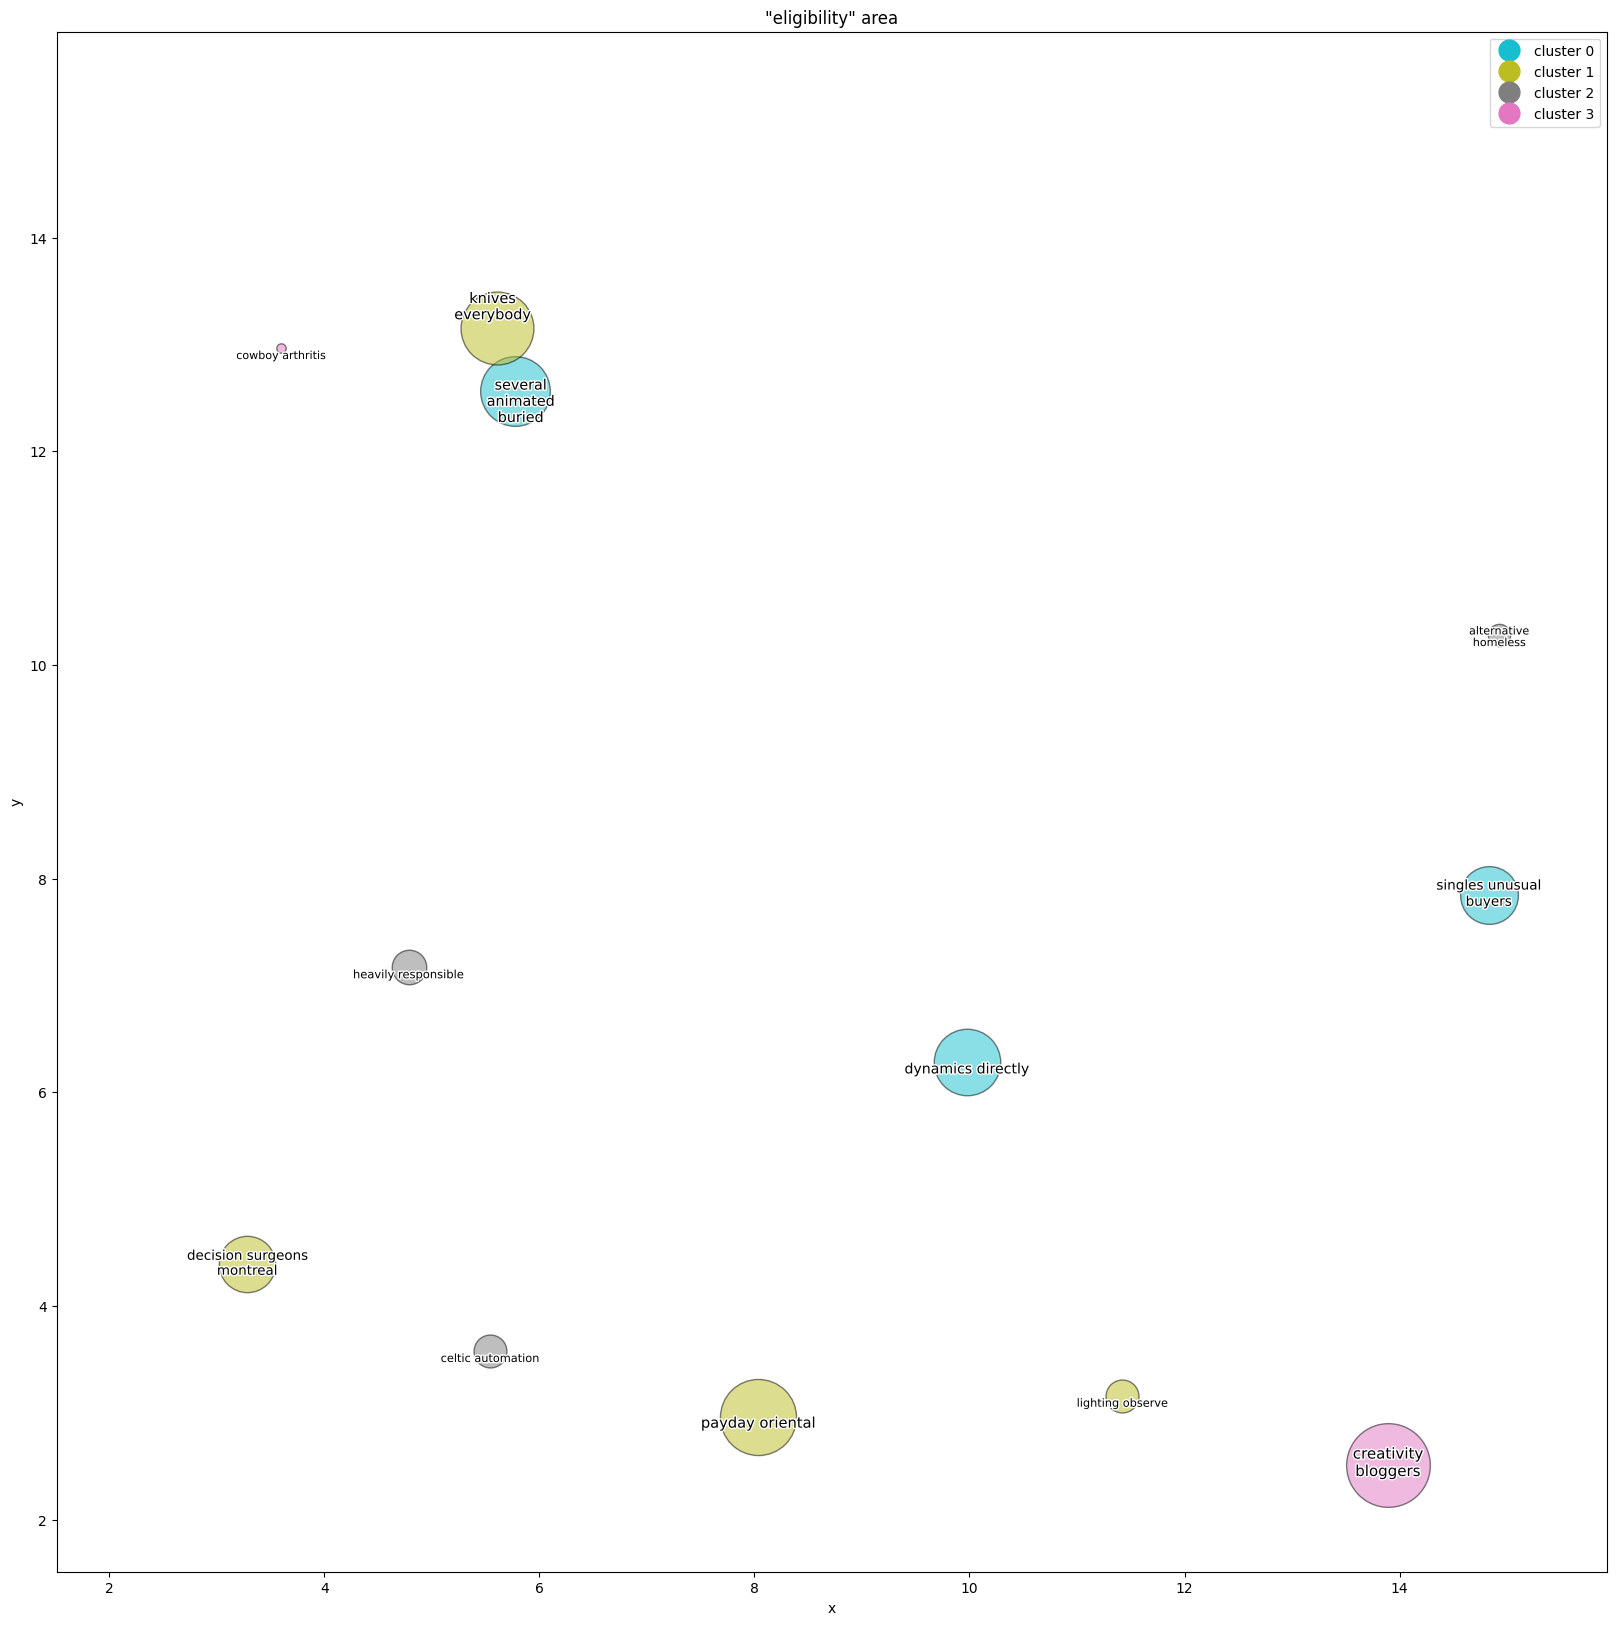

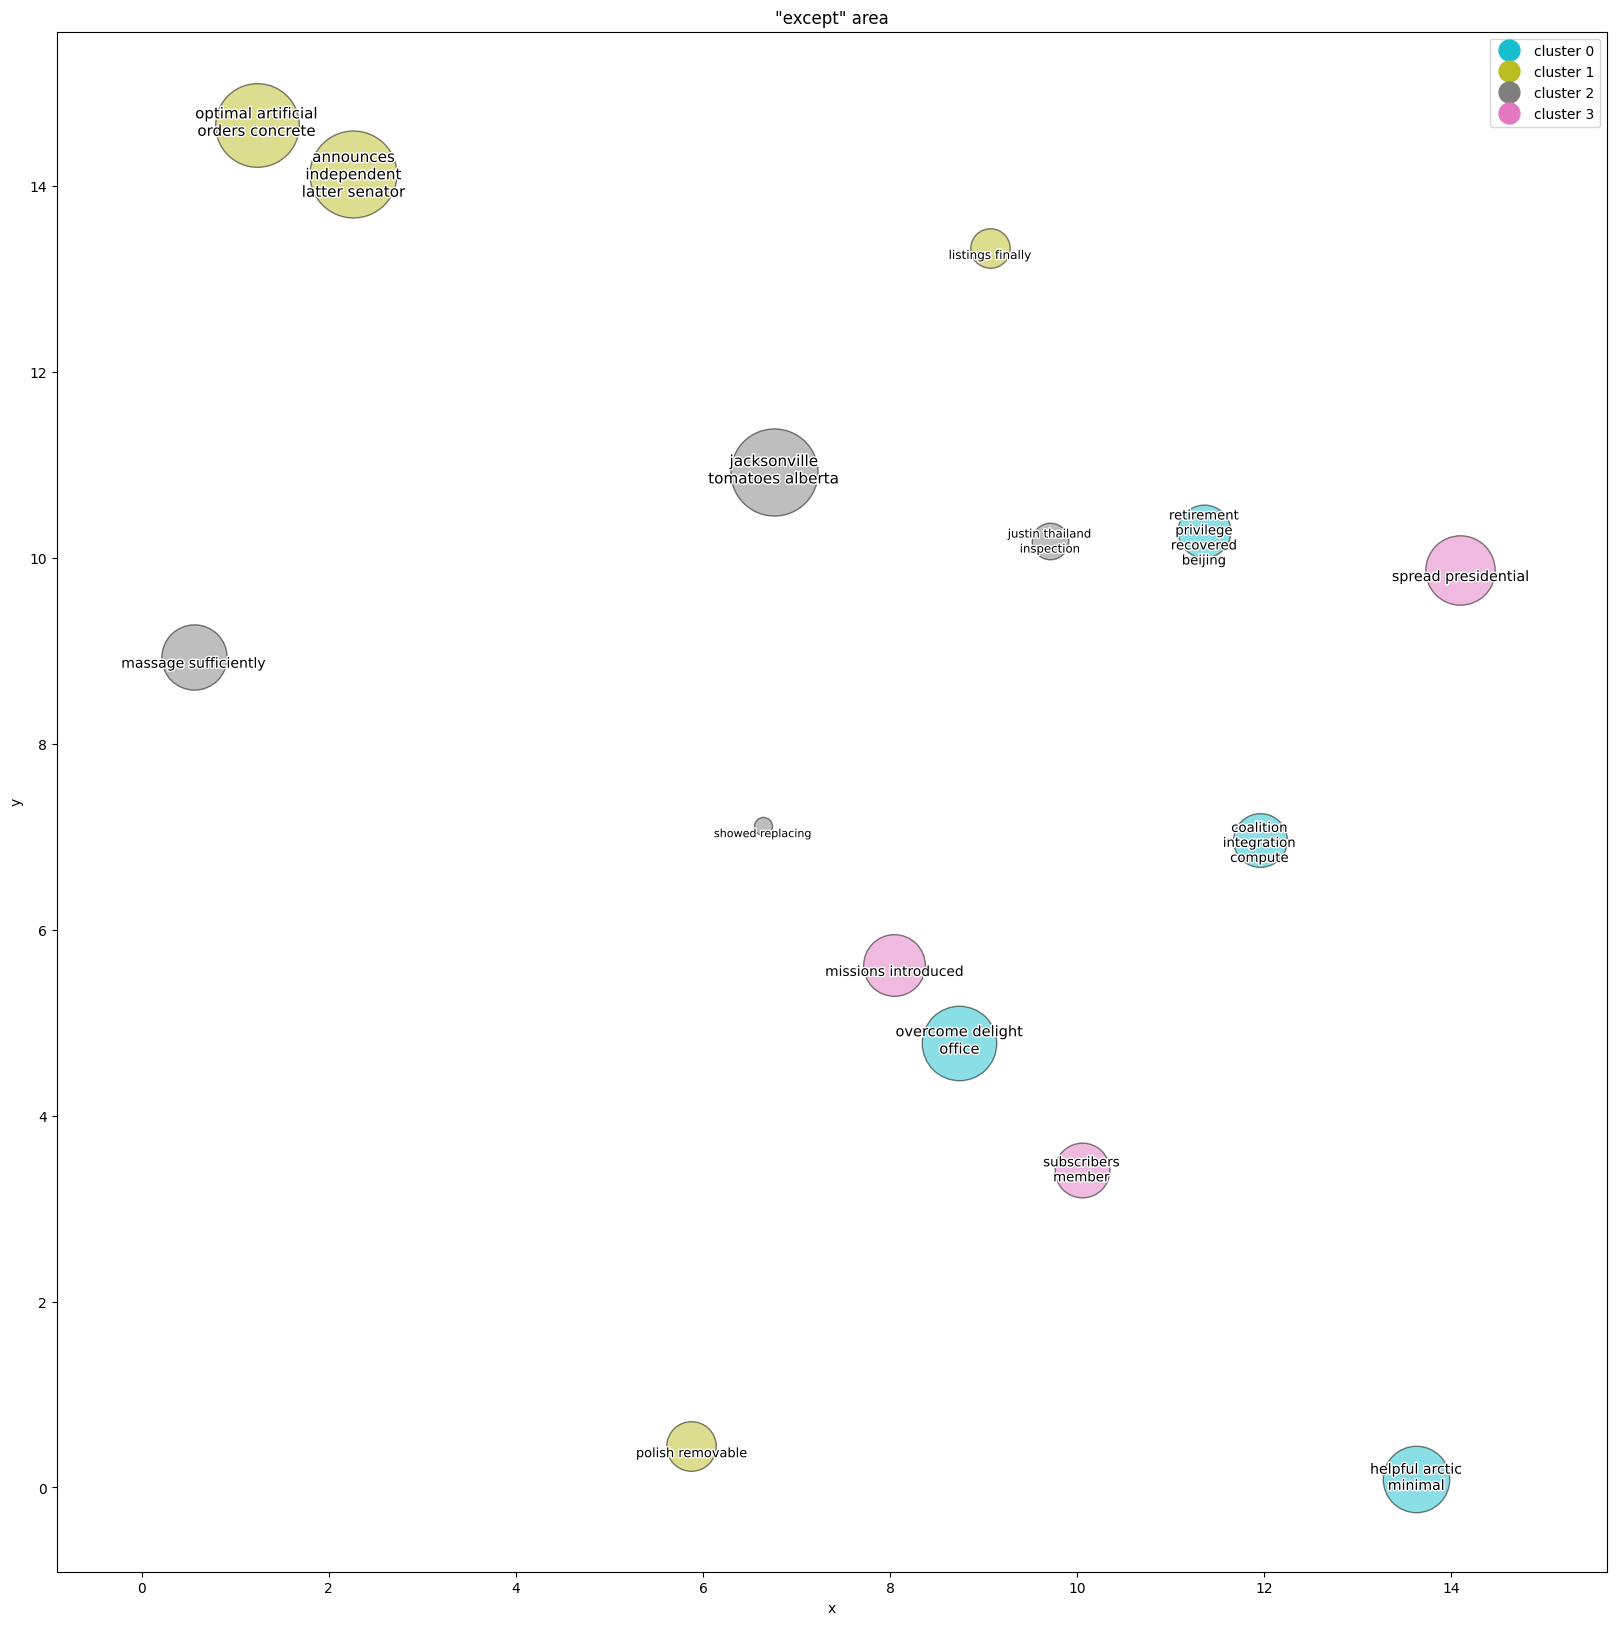

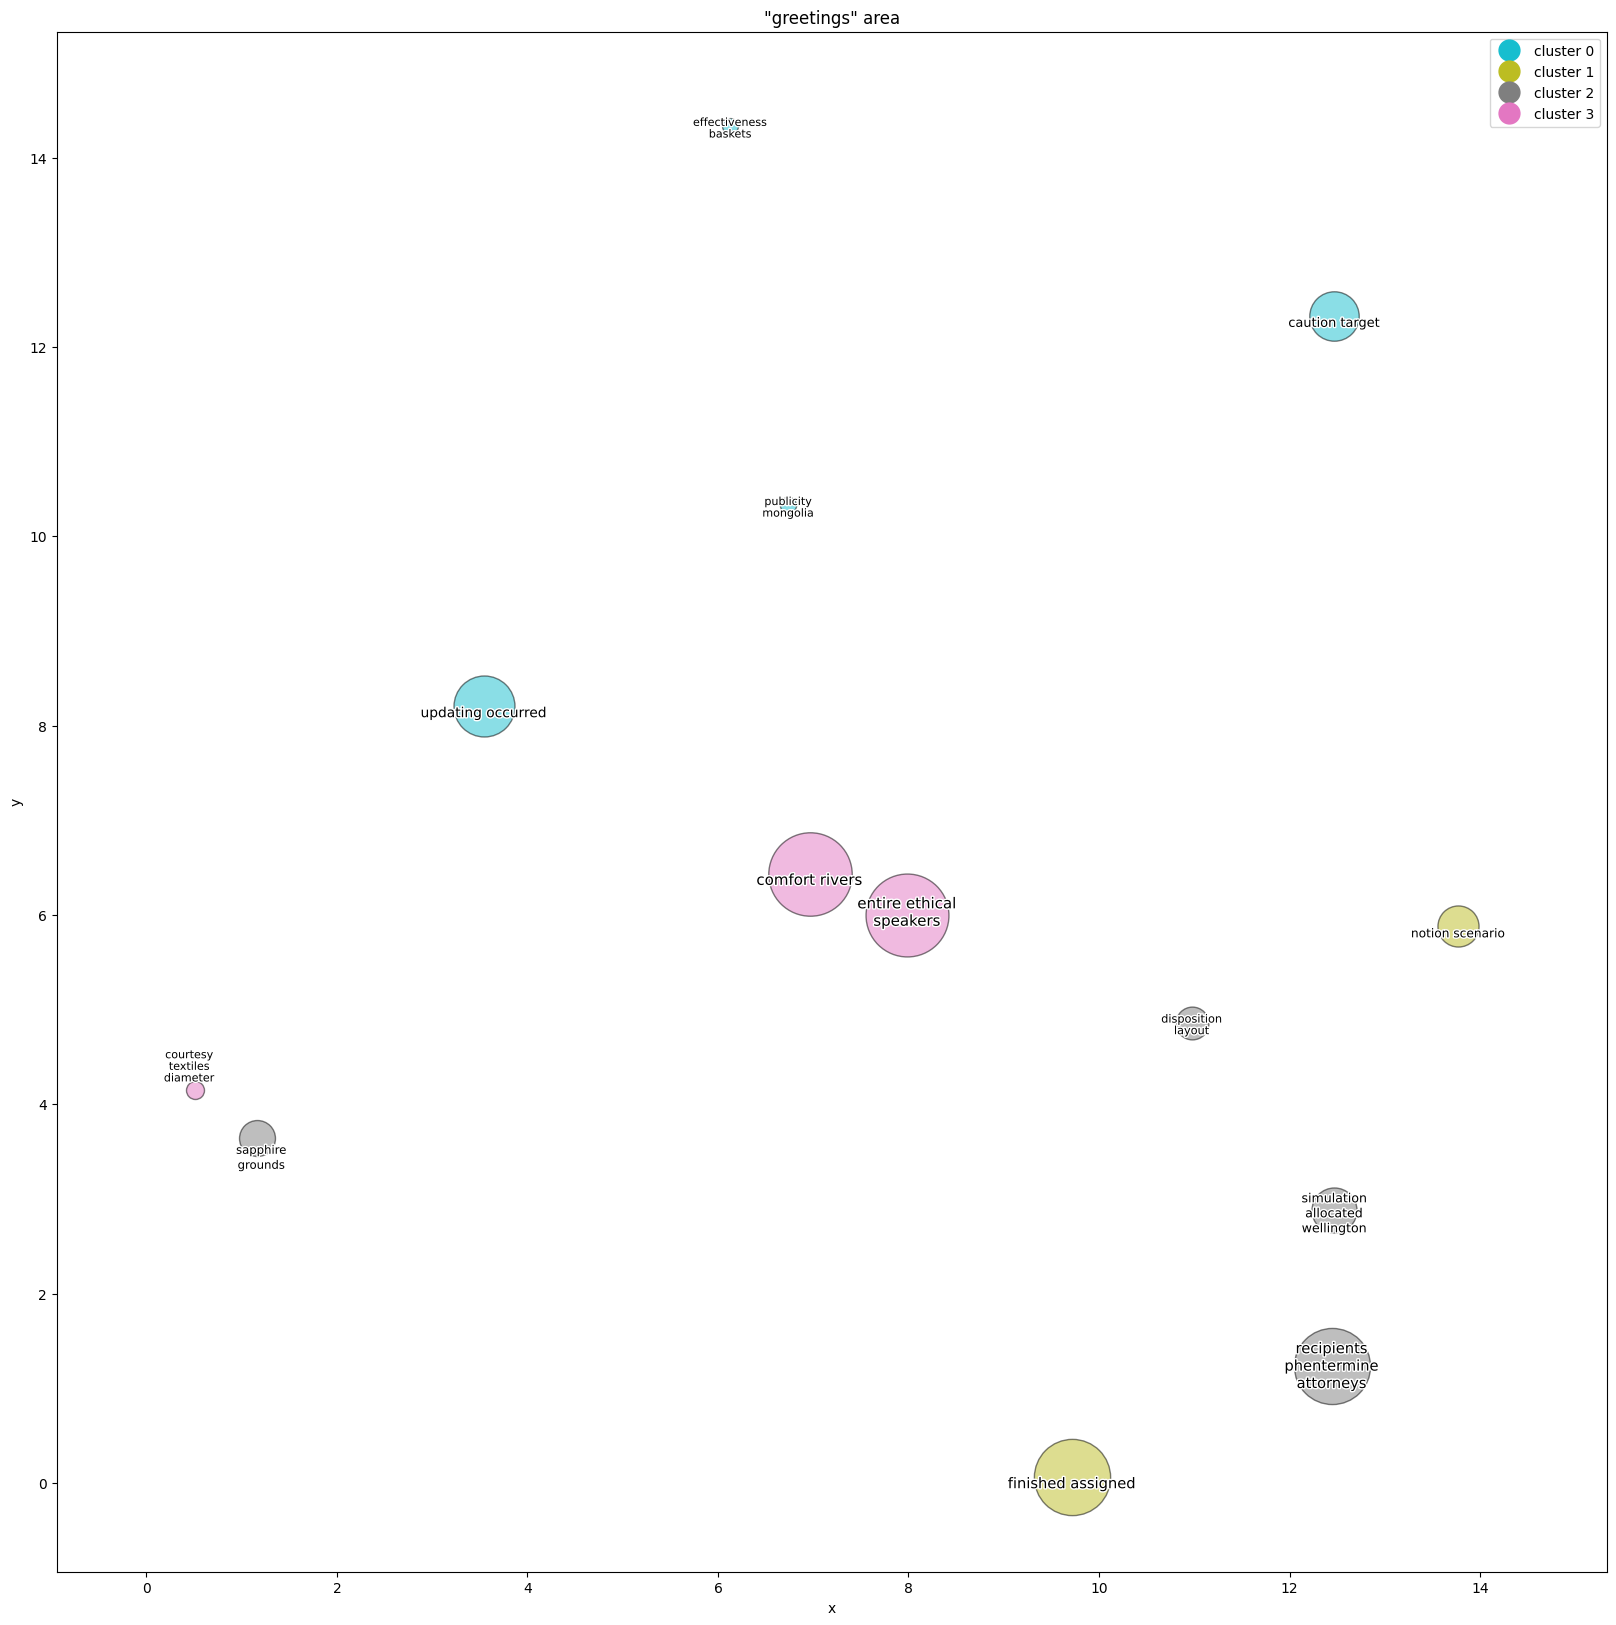

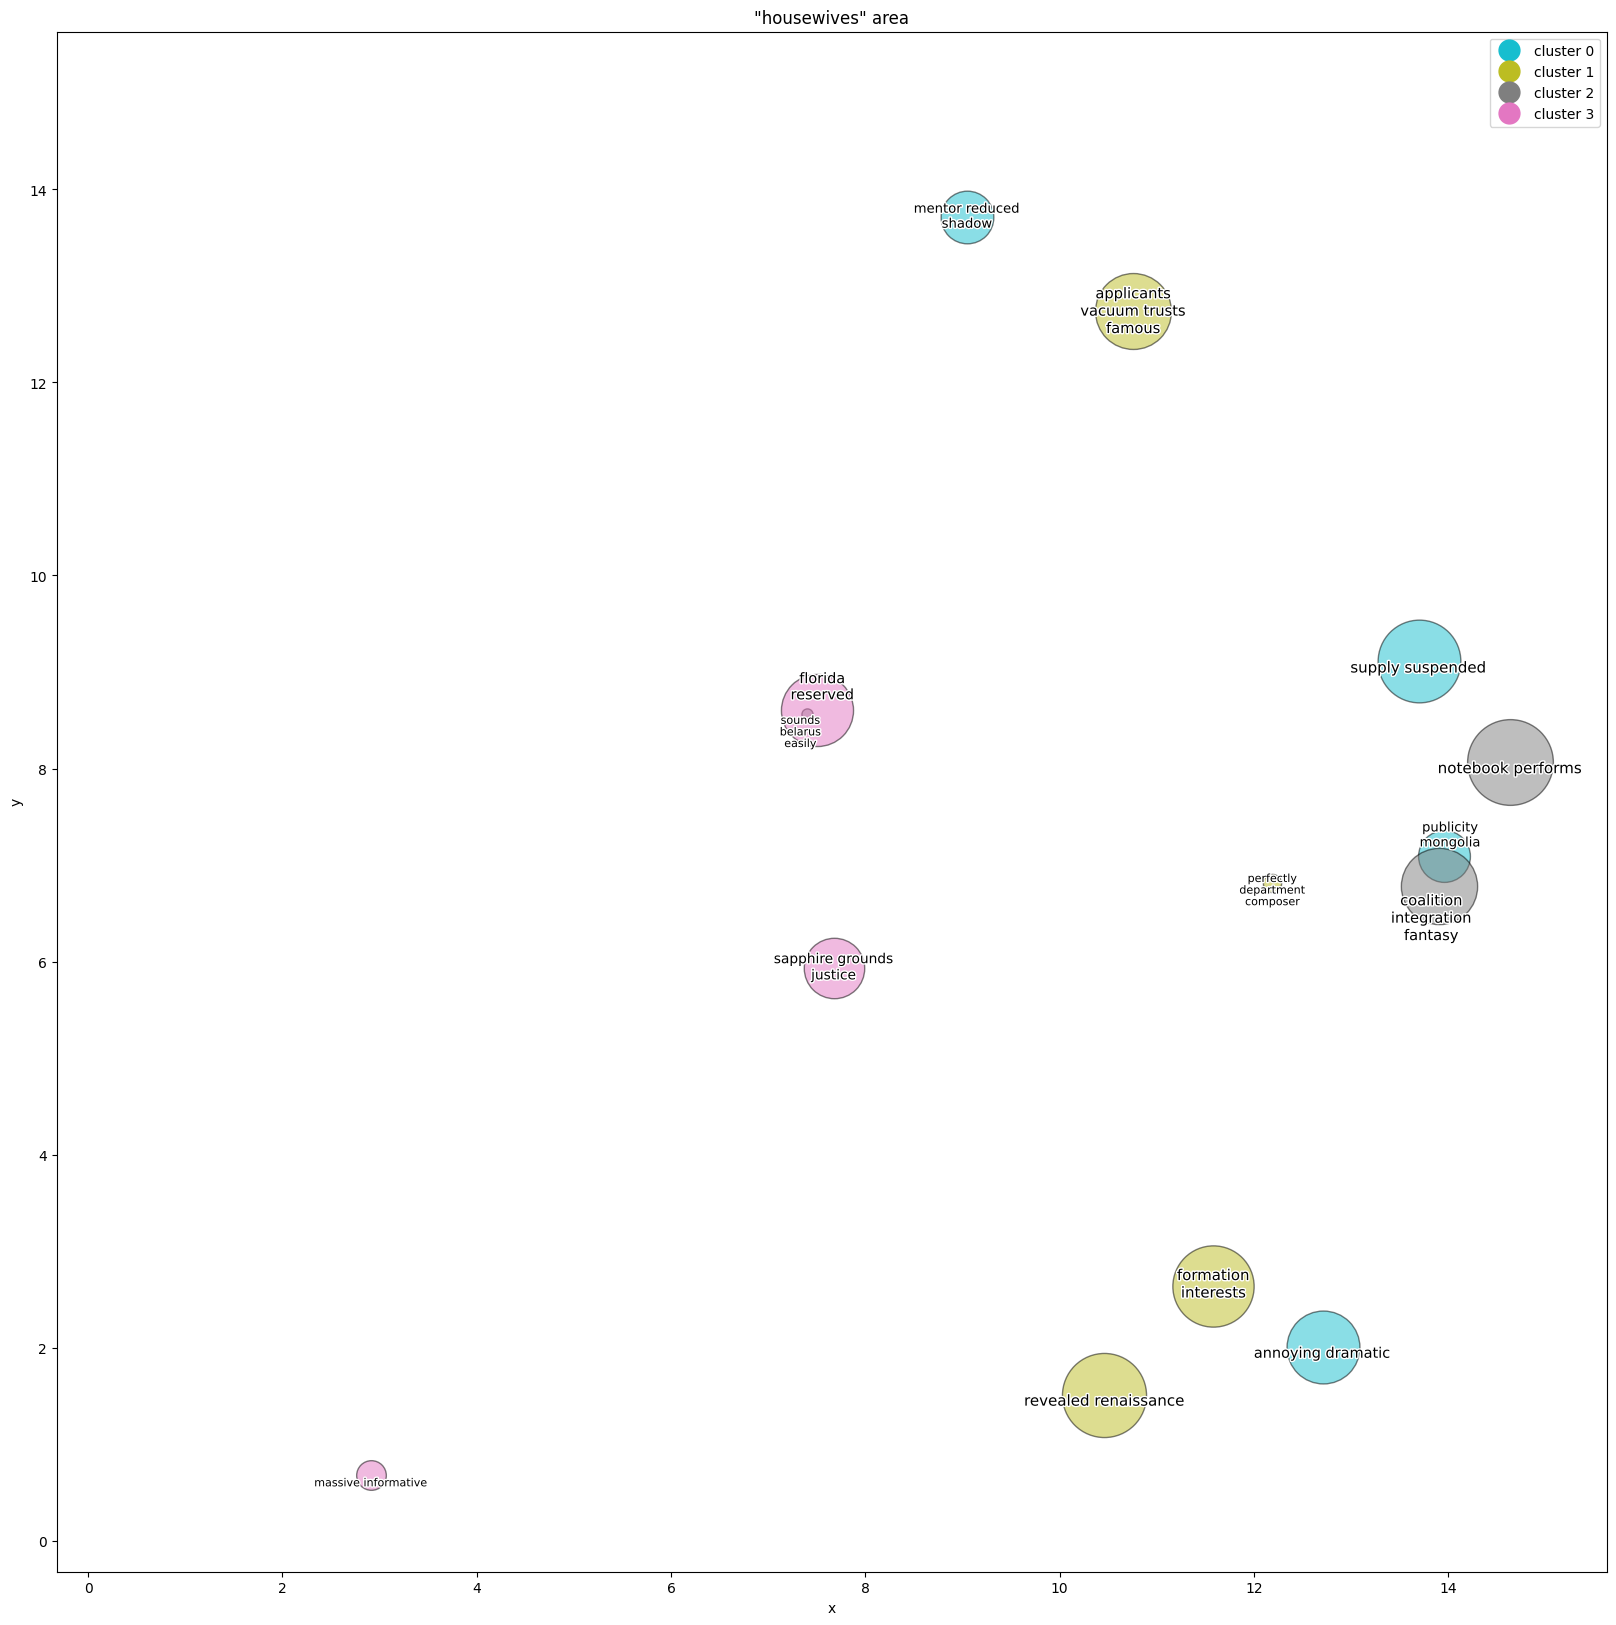

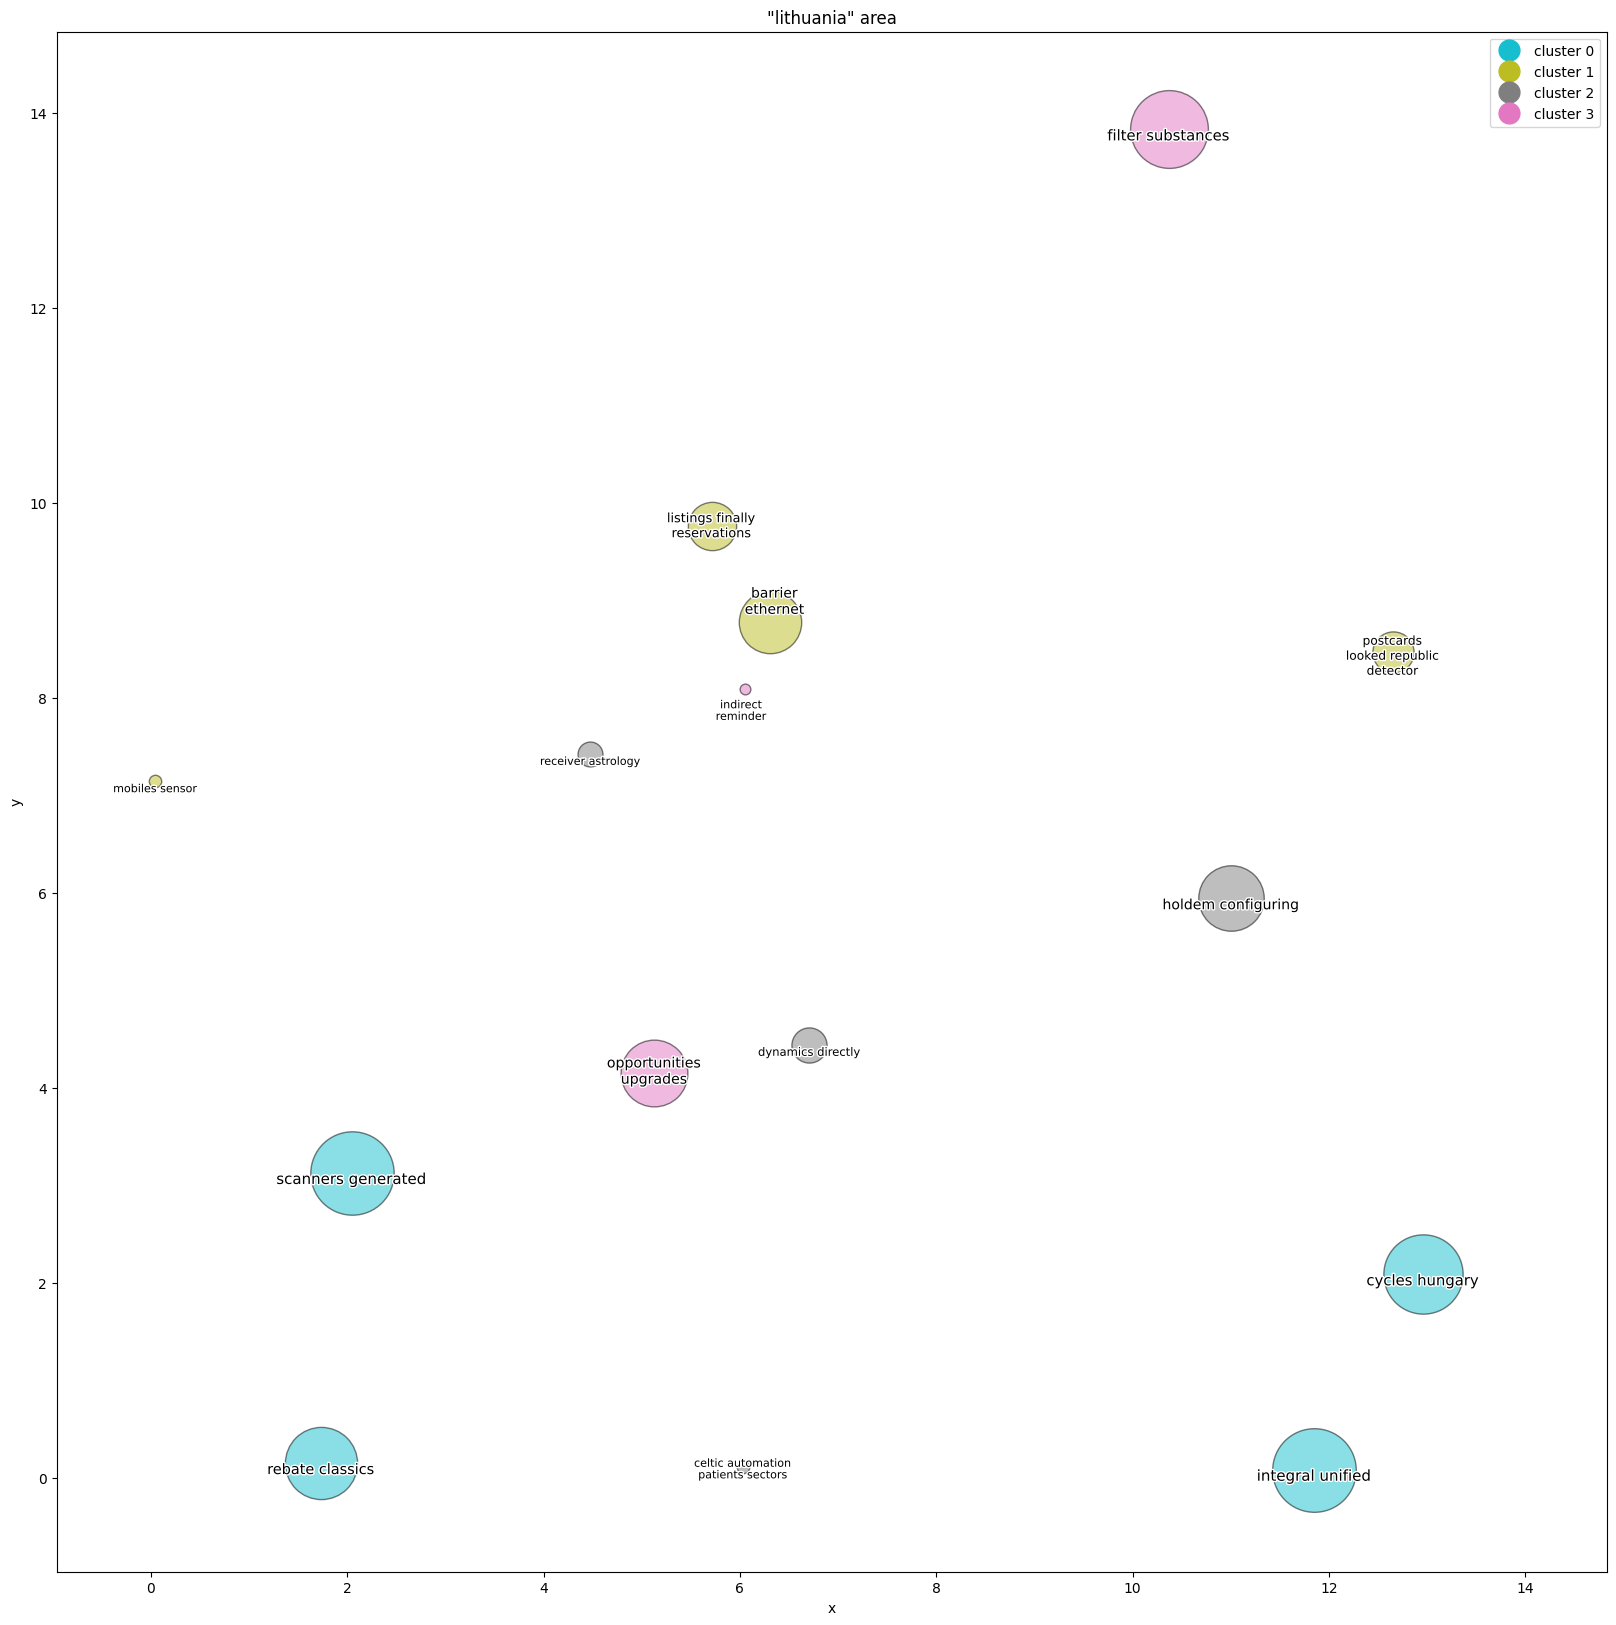

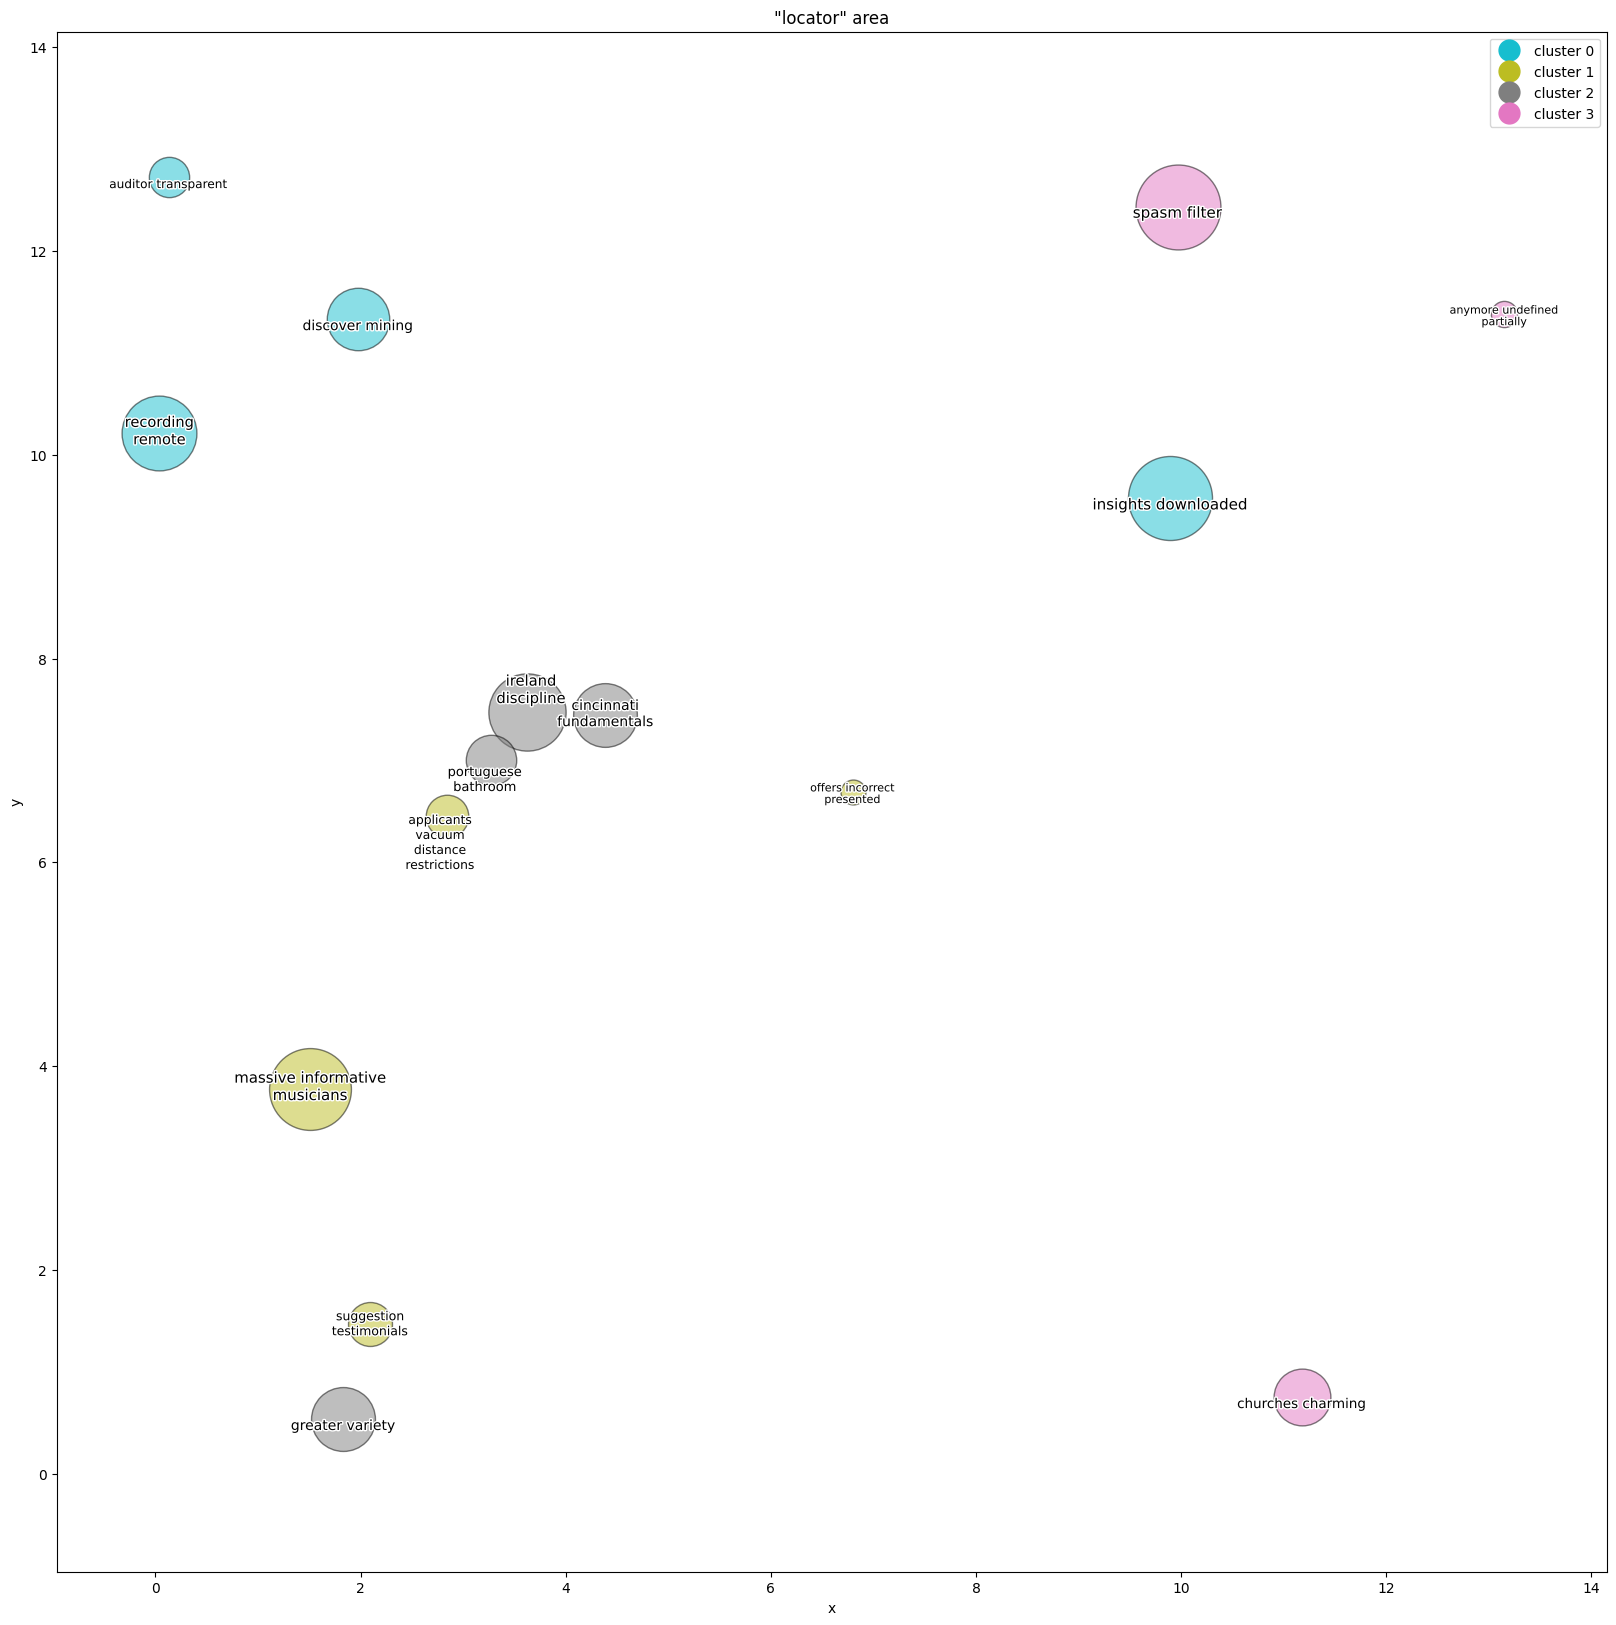

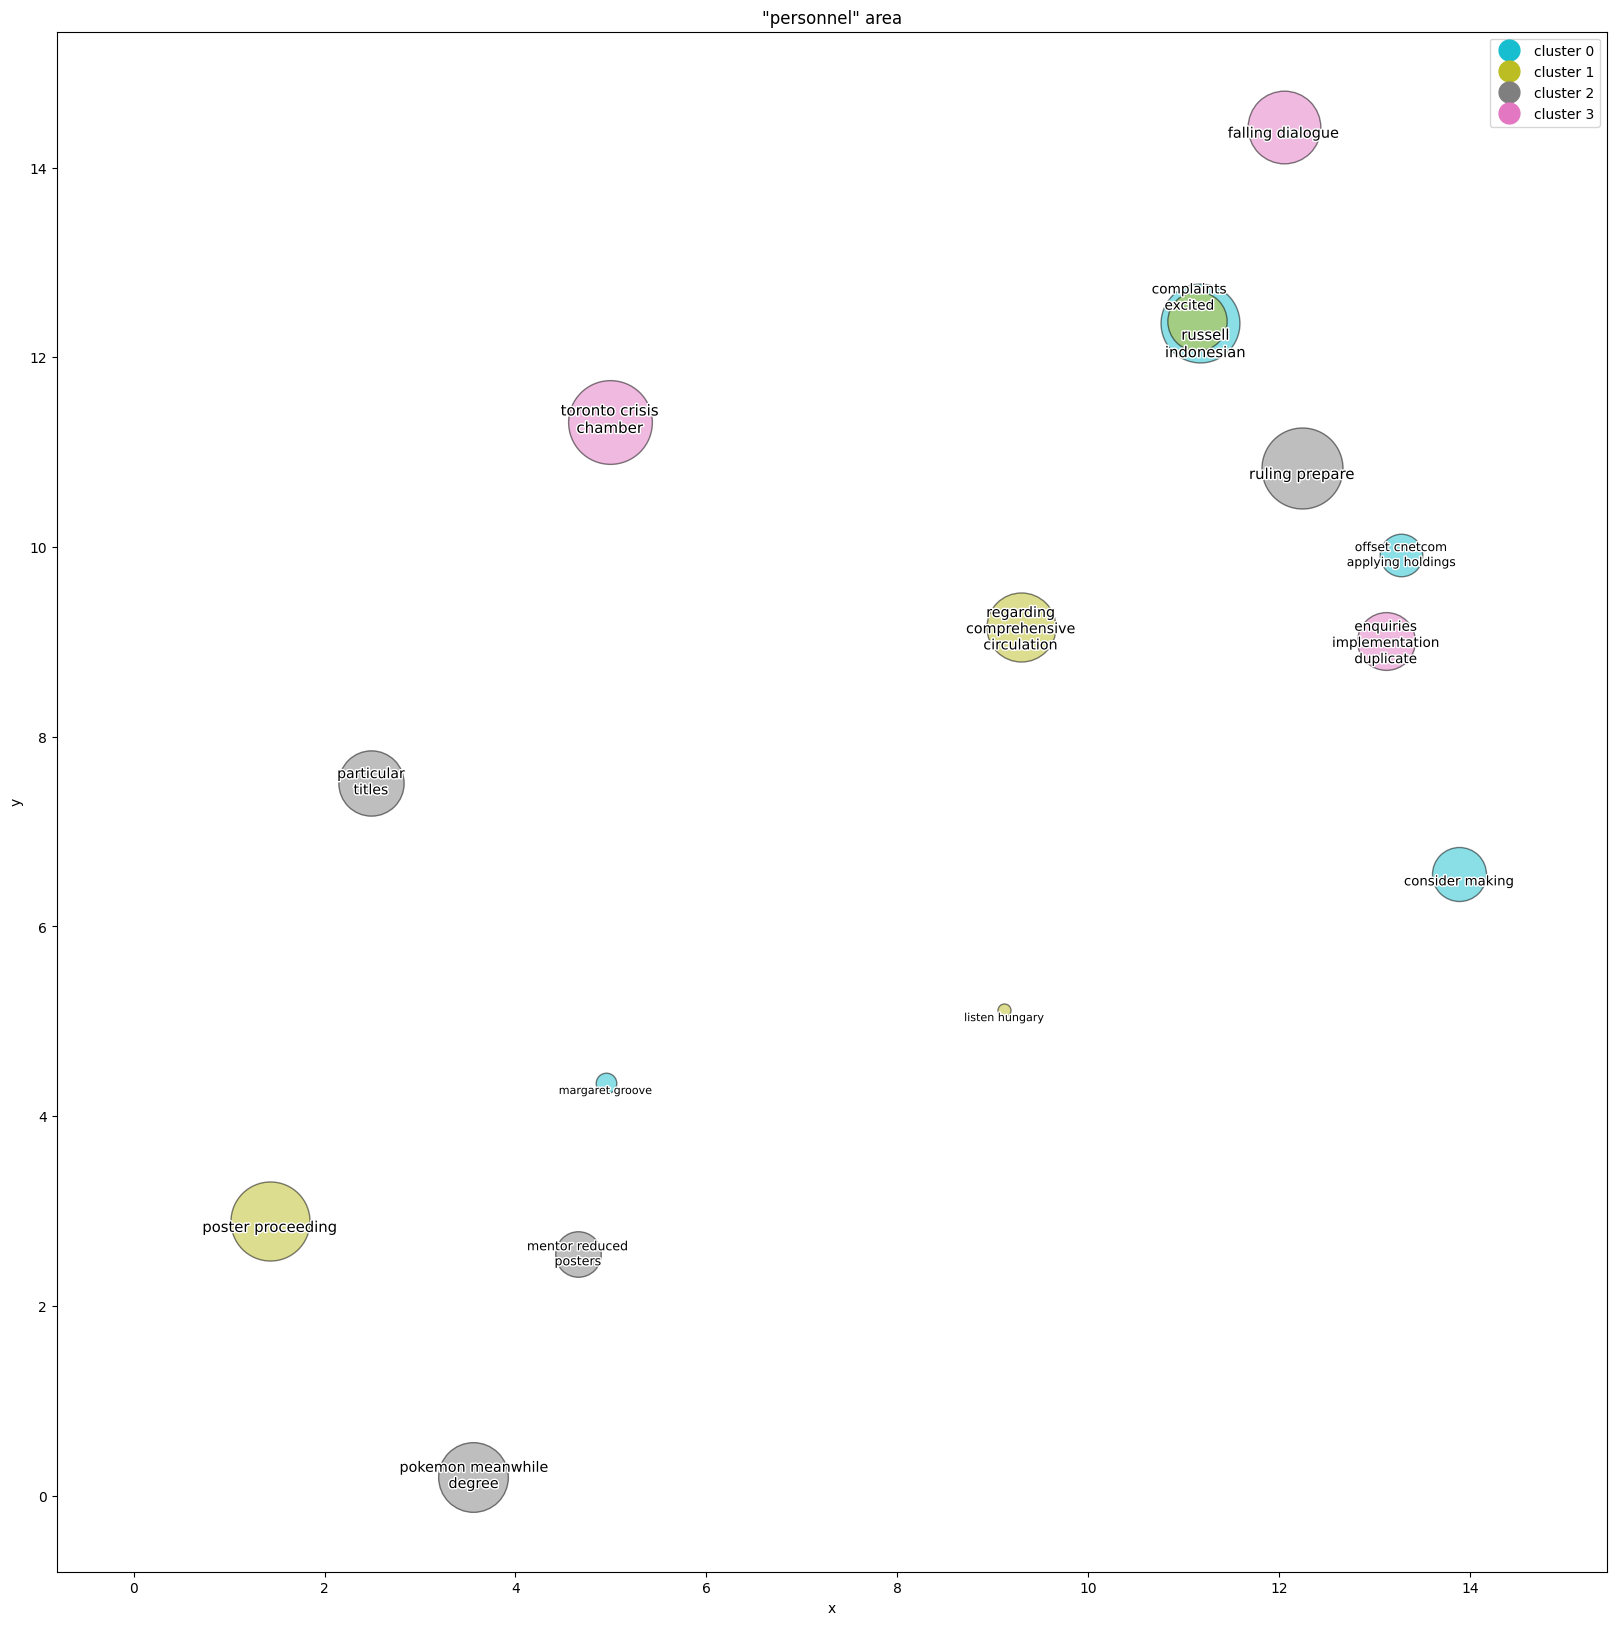

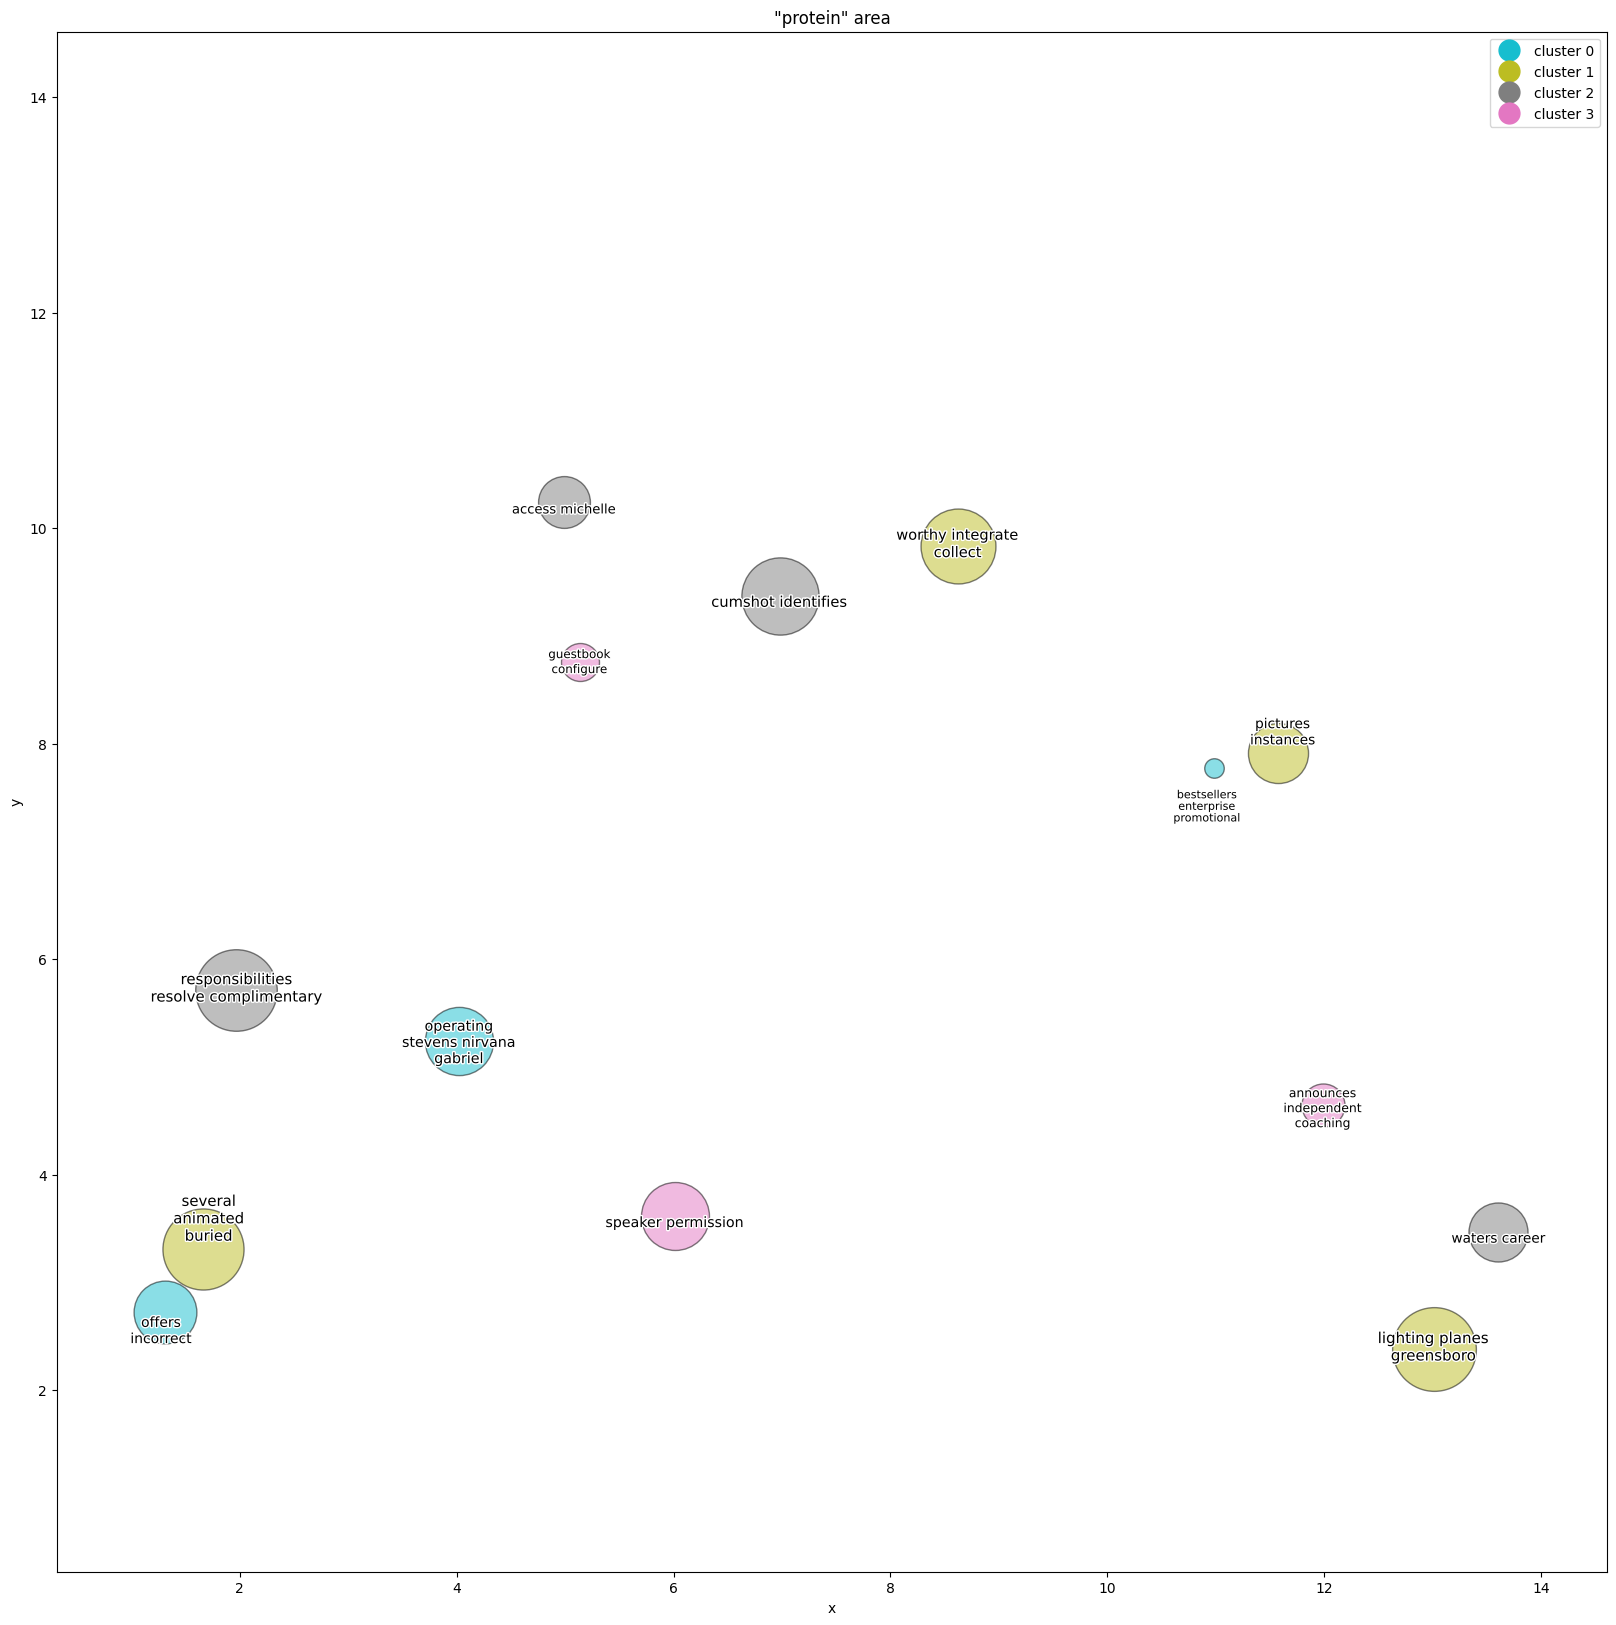

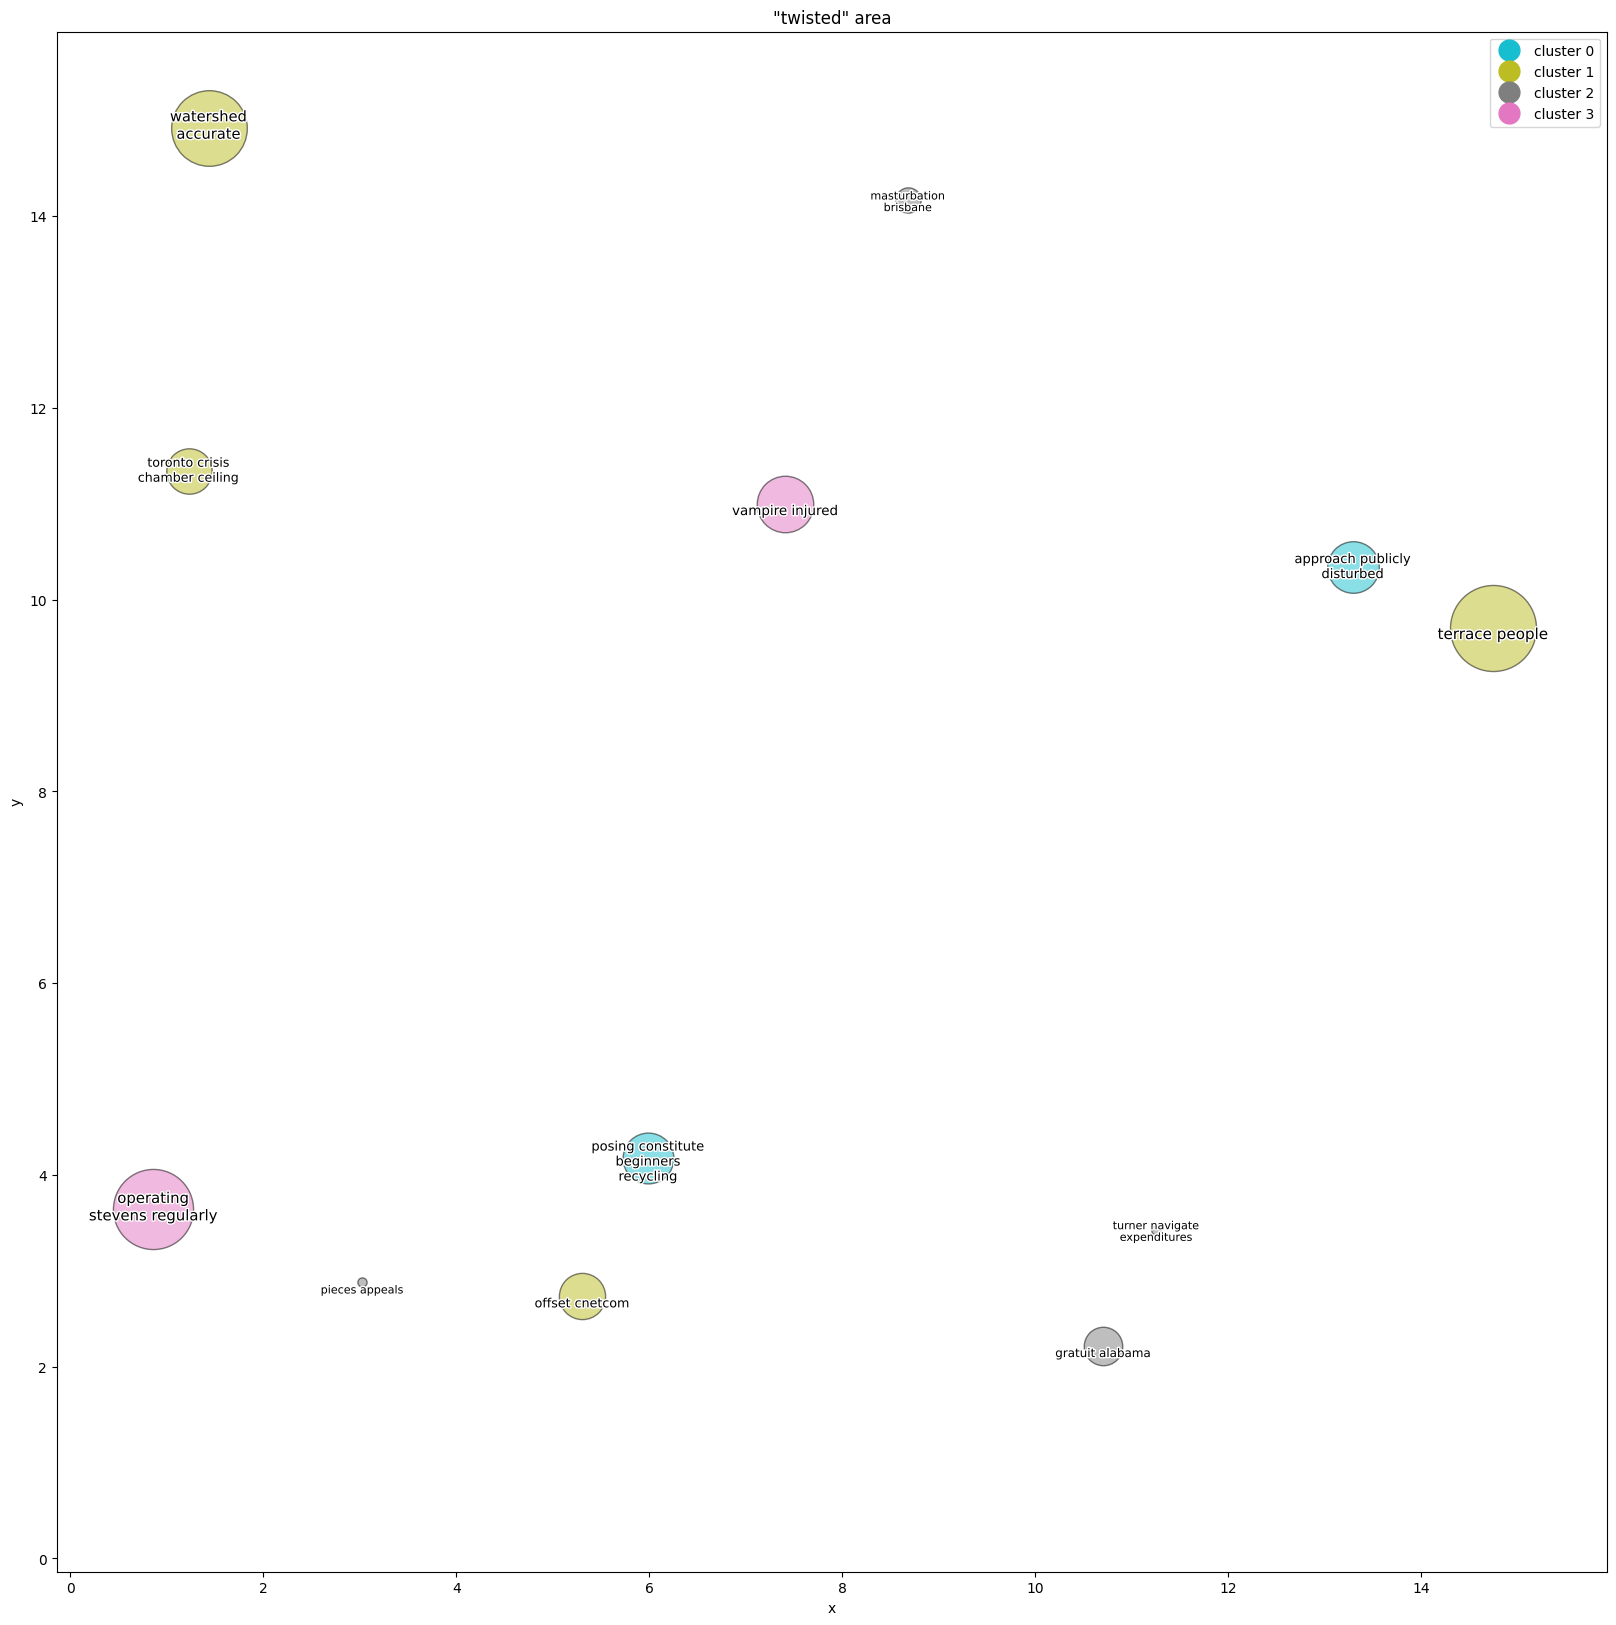

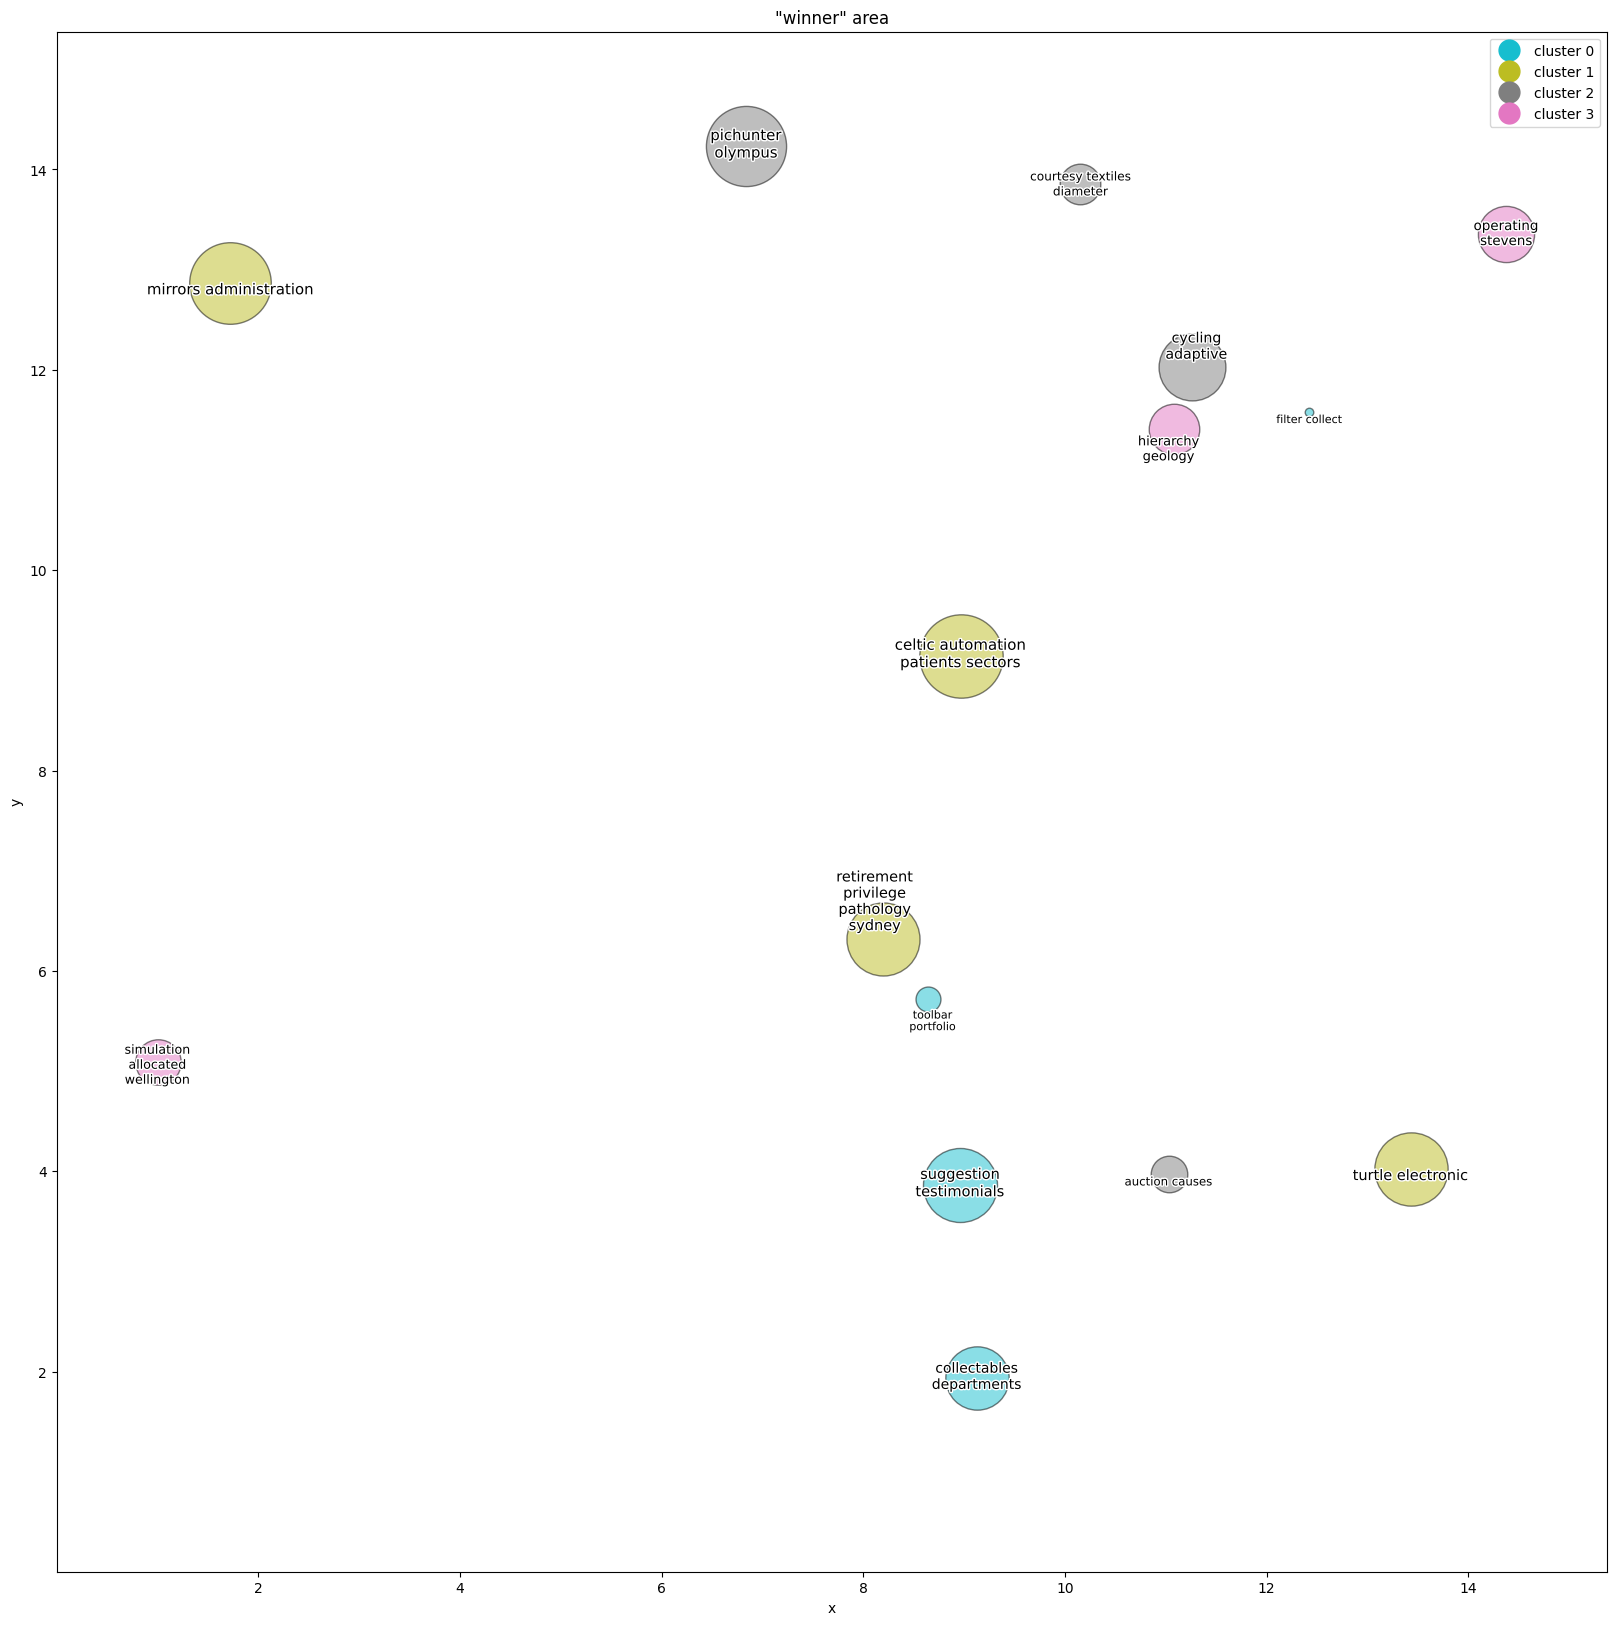

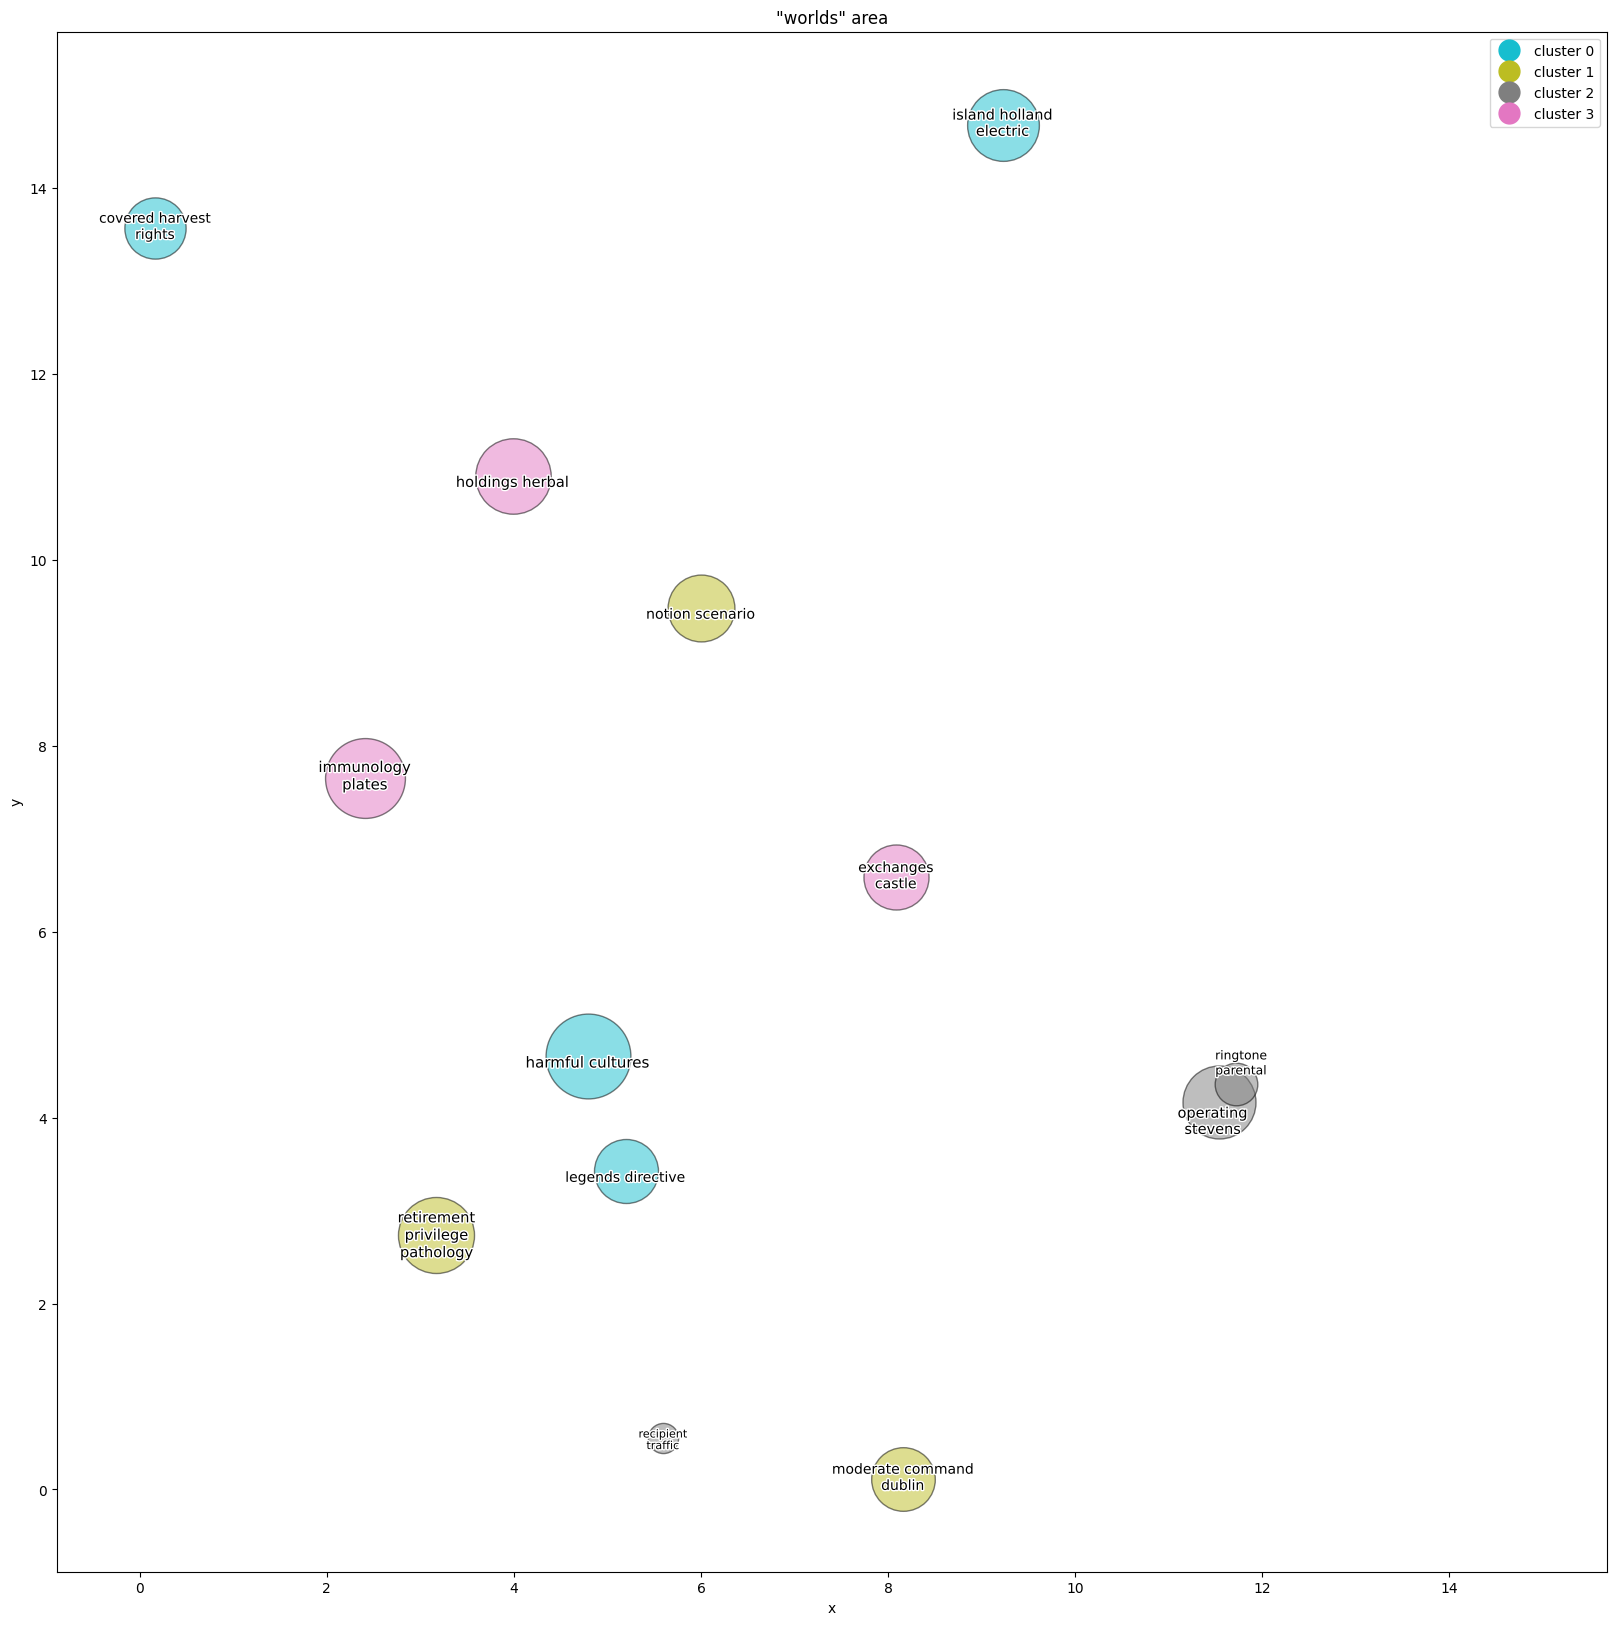

In [13]:
def change_str(s: str) -> str: # Функция для переноса слишком длинных словосочетаний
    l = s.split(' ')
    length = len(l[0])
    s = l[0]
    for i in range(1, len(l)):
        if length > 8: # Если на строке уже имеется 8 символов, переходим на новую строку
            s += '\n'
            length = len(l[i])
        else:
            s += ' '
            length += len(l[i])
        s += l[i]
    return s

for area in pd.unique(df['area']): # Для каждой area
    fig, ax = plt.subplots()
    fig.set_figheight(20)
    fig.set_figwidth(20)

    data = df[df['area'] == area]
    for i in data.index: # Размечаем точки на диаграмме рассеивания
        ax.scatter(x = data['x'][i],
                   y = data['y'][i],
                   s = 2 * data['count'][i], # Размер объекта на графике
                   c = data['color'][i], # Цвет
                   edgecolors = 'black', # Обводка
                   alpha = 0.5) # Прозрачность, чтобы все точки были видны на графике

    handles = [] # Создание легенды
    labels = []
    colors = {k: v for k, v in zip(pd.unique(data.cluster), ['#17becf', '#bcbd22', '#7f7f7f','#e377c2'])}
    for cluster in colors:
        handles.append(plt.Line2D([0], [0], marker = 'o', color = colors[cluster], markersize = 15, linestyle = 'None'))
        labels.append(f'cluster {cluster}')

    for i in data.index: # Добавление подписей для каждого объекта
        x, y = data['x'][i], data['y'][i]
        s = change_str(data['keyword'][i]) # Форматировали подпись

        k = s.count('\n') # Эти коэффицициенты для смещения подписей и избежания их наложения
        kx, ky = 0, -max(8, 8 * k)
        distance = 1e10
        for _, obj in data.iterrows(): # Ищем ближайший объект евклидовым расстоянием
            d = ((obj['x'] - x) ** 2 + (obj['y'] - y) ** 2) ** 0.5
            if d < distance and d != 0:
                difx = x - obj['x']
                dify = y - obj['y']
                distance = d

        if abs(difx) < 0.7 and abs(dify) < 0.7: # Если он достаточно близко
            s = s.replace(' ', '\n') # Вытягиваем строчку в высоту
            if dify <= 0: # Если текущий объект ниже, его подпись будет смещена вниз
                ky = 2 * ky - 100 / math.log(max(256, 1e5 * distance), 2)
            else: # Иначе - вверх
                ky = 100 / math.log(max(256, 1e5 * distance), 2)
            if difx <= 0: # Если объект левее, его подпись будет смещена влево
                kx = -k - 50 / math.log(1e5 * distance, 2)
            else: # Иначе - вправо
                kx = k + 50 / math.log(1e5 * distance, 2) # Есть обратная зависимость расстояния между объектами и смещения подписей

        ax.annotate(s, (x, y), textcoords = "offset points",
                    xytext = (kx, ky), ha = 'center', # Смещение подписи относительно центра
                    fontsize = max(math.log(data['count'][i], 2), 8), # Шрифт не меньше 8
                    path_effects = [withStroke(linewidth = 2, foreground = "w")]) # Обводка подписи

    mx = max(data['x'].max(), data['y'].max())
    mn = min(data['x'].min(), data['y'].min())
    ax.set_xlim(mn - 1, mx + 1) # Смещение осей во избежание выхода текста и объекта за график
    ax.set_ylim(mn - 1, mx + 1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'"{area}" area') # "Footer" подпись изображения
    ax.legend(handles, labels)

    area = area.replace('\\', '_') # Для Windows
    plt.savefig(f'.\\visualisation\\{area}.png')
    plt.show()